
# <font color= blue>Telecom Churn Case Study</font>

**Problem statement:** In Telecom industry, customer can choose from multiple service providers and hence retaining such customer is also a important task for company. We need to Identify if the high value customers of a Telecom company would usage-based churn or not. In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

**Objective:** The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

In [1]:

# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer

# importing packages for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# supressing warnings
import warnings
warnings.filterwarnings('ignore')

# For better output display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
sns.set_context('notebook')

## Step1: Data Reading and initial data inspection

Here,
- task 1.1: We read the 'telecom_churn_data' dataset
- task 1.2: Perform quick inspection about the source dataframe

**Task 1.1: Reading the 'telecom_churn_data' dataset**

In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom.shape

(99999, 226)

- As we can see, that number of rows and columns is quite high hence thorough data inspection is needed.
- First we will check the datatypes followed by general statistical information of dataset.
- Then we will check the presence of null values in a dataset. If a certain column contains significant null values, then we have to drop the column. If there are very few ull values or missing records, we will impute them with proven techniques.

**Task 1.2: Inspecting the dataframe**

In [5]:
telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# Checking the null values percentage

round(telecom.isna().mean()*100,4)

mobile_number                0.0000
circle_id                    0.0000
loc_og_t2o_mou               1.0180
std_og_t2o_mou               1.0180
loc_ic_t2o_mou               1.0180
last_date_of_month_6         0.0000
last_date_of_month_7         0.6010
last_date_of_month_8         1.1000
last_date_of_month_9         1.6590
arpu_6                       0.0000
arpu_7                       0.0000
arpu_8                       0.0000
arpu_9                       0.0000
onnet_mou_6                  3.9370
onnet_mou_7                  3.8590
onnet_mou_8                  5.3781
onnet_mou_9                  7.7451
offnet_mou_6                 3.9370
offnet_mou_7                 3.8590
offnet_mou_8                 5.3781
offnet_mou_9                 7.7451
roam_ic_mou_6                3.9370
roam_ic_mou_7                3.8590
roam_ic_mou_8                5.3781
roam_ic_mou_9                7.7451
roam_og_mou_6                3.9370
roam_og_mou_7                3.8590
roam_og_mou_8               

**Observation:**
- We can see that there are few columns with more than 70% Missing values whereas few are with as low as 1.6% Missing values. We can either drop these column or impute them.
- Careful data reading and telecom domain application can be done in such cases to proceed ahead with the decision.
- e.g. Missing values such as Rechage are not missing at random. It means that the user has not done recharge for that particular time. Hence instead of dropping the variables. It can be imputed with 0

## Step 2: Data Cleaning

Here, the missing value treatment is performed

In [8]:
# Checking the column variance
non_var_cols=[]
for col in telecom.columns:
    if telecom[col].nunique() == 1:
        non_var_cols.append(col)

In [9]:
non_var_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

**Observation:** Since the above columns have unique values and no variance in the data, they can be dropped. They will not contribute much in the information.

In [10]:
telecom.drop(non_var_cols, axis=1,inplace = True)

Since the variable 'total_rech_data*' is the sum of 'count_rech_2g*' and 'count_rech_3g'. These two variable can be dropped. Also the column 'mobile_number' is not required for the analysis. Hence this variable can be dropped as well

In [11]:
telecom.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
              'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
              'mobile_number'],axis=1,inplace = True)

**Observation:** 
- If the recharge column is missing along with date column available, then it can be considered that the missing value is actually missing.
- However, if the recharge column is missing when the date column is missing, then it can be considered that the customer has really not recharged and hence these missing values can be imputed with 0

In [12]:
# Checking the rows with NULL that are randomly missing

data_rech_invalid_mnth_6 = telecom['total_rech_data_6'].isna() & telecom['date_of_last_rech_data_6'].notnull()
data_rech_invalid_mnth_7 = telecom['total_rech_data_7'].isna() & telecom['date_of_last_rech_data_7'].notnull()
data_rech_invalid_mnth_8 = telecom['total_rech_data_8'].isna() & telecom['date_of_last_rech_data_8'].notnull()
data_rech_invalid_mnth_9 = telecom['total_rech_data_9'].isna() & telecom['date_of_last_rech_data_9'].notnull()

max_data_rech_invalid_mnth_6 = telecom['max_rech_data_6'].isna()& telecom['date_of_last_rech_data_6'].notnull()
max_data_rech_invalid_mnth_7 = telecom['max_rech_data_7'].isna()& telecom['date_of_last_rech_data_7'].notnull()
max_data_rech_invalid_mnth_8 = telecom['max_rech_data_8'].isna()& telecom['date_of_last_rech_data_8'].notnull()
max_data_rech_invalid_mnth_9 = telecom['max_rech_data_9'].isna()& telecom['date_of_last_rech_data_9'].notnull()

avg_data_rech_invalid_mnth_6 = telecom['av_rech_amt_data_6'].isna()& telecom['date_of_last_rech_data_6'].notnull()
avg_data_rech_invalid_mnth_7 = telecom['av_rech_amt_data_7'].isna()& telecom['date_of_last_rech_data_7'].notnull()
avg_data_rech_invalid_mnth_8 = telecom['av_rech_amt_data_8'].isna()& telecom['date_of_last_rech_data_8'].notnull()
avg_data_rech_invalid_mnth_9 = telecom['av_rech_amt_data_9'].isna()& telecom['date_of_last_rech_data_9'].notnull()

In [13]:
print("month 6 total data recharge random missing: ",data_rech_invalid_mnth_6.sum())
print("month 7 total data recharge random missing: ",data_rech_invalid_mnth_7.sum())
print("month 8 total data recharge random missing: ",data_rech_invalid_mnth_8.sum())
print("month 9 total data recharge random missing: ",data_rech_invalid_mnth_9.sum())
print("----------------------------------------------")

print("month 6 max data recharge random missing: ",max_data_rech_invalid_mnth_6.sum())
print("month 7 max data recharge random missing: ",max_data_rech_invalid_mnth_7.sum())
print("month 8 max data recharge random missing: ",max_data_rech_invalid_mnth_8.sum())
print("month 9 max data recharge random missing: ",max_data_rech_invalid_mnth_9.sum())
print("----------------------------------------------")

print("month 6 avg data recharge random missing: ",max_data_rech_invalid_mnth_6.sum())
print("month 7 avg data recharge random missing: ",max_data_rech_invalid_mnth_7.sum())
print("month 8 avg data recharge random missing: ",max_data_rech_invalid_mnth_8.sum())
print("month 9 avg data recharge random missing: ",max_data_rech_invalid_mnth_9.sum())

month 6 total data recharge random missing:  0
month 7 total data recharge random missing:  0
month 8 total data recharge random missing:  0
month 9 total data recharge random missing:  0
----------------------------------------------
month 6 max data recharge random missing:  0
month 7 max data recharge random missing:  0
month 8 max data recharge random missing:  0
month 9 max data recharge random missing:  0
----------------------------------------------
month 6 avg data recharge random missing:  0
month 7 avg data recharge random missing:  0
month 8 avg data recharge random missing:  0
month 9 avg data recharge random missing:  0


**Observation:** Since there are no values where, the recharge columns are missing when the date column is available, all the recharge missing values can be imputed with 0

In [14]:
rech_impute_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                    'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
                    'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

In [15]:
# Imputing the analyzed recharge columns with 0
telecom[rech_impute_cols] = telecom[rech_impute_cols].apply(lambda x: x.fillna(0))

**Observation:** Removing the date columns from the dataset as they donot contribute in analysis

In [16]:
date_cols =[]
for col in telecom.columns:
    parse = col.split('_')
    if 'date' in parse:
        date_cols.append(col)

In [17]:
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [18]:
telecom.drop(date_cols,axis=1, inplace = True)

**Observation:** The variables night pack users and fb users have very large proportion of vissing values (>50%) and these variables doesn't contribute much analysis. Hence these variables can be dropped

In [19]:
del_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
            'fb_user_6','fb_user_7','fb_user_8','fb_user_9',
            'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9']

In [20]:
telecom.drop(del_cols,axis=1, inplace=True)

In [21]:
# Cheking if the above null value treatment is correctly implemented

round(telecom.isna().mean()*100,4).sort_values(ascending=False)

loc_og_t2c_mou_9      7.7451
roam_ic_mou_9         7.7451
loc_og_t2f_mou_9      7.7451
loc_og_t2m_mou_9      7.7451
isd_ic_mou_9          7.7451
isd_og_mou_9          7.7451
std_ic_mou_9          7.7451
loc_og_t2t_mou_9      7.7451
std_ic_t2f_mou_9      7.7451
std_og_t2t_mou_9      7.7451
roam_og_mou_9         7.7451
std_ic_t2m_mou_9      7.7451
ic_others_9           7.7451
std_ic_t2t_mou_9      7.7451
spl_ic_mou_9          7.7451
loc_ic_mou_9          7.7451
std_og_mou_9          7.7451
offnet_mou_9          7.7451
loc_ic_t2f_mou_9      7.7451
std_og_t2f_mou_9      7.7451
loc_ic_t2m_mou_9      7.7451
onnet_mou_9           7.7451
loc_ic_t2t_mou_9      7.7451
loc_og_mou_9          7.7451
std_og_t2m_mou_9      7.7451
spl_og_mou_9          7.7451
og_others_9           7.7451
isd_ic_mou_8          5.3781
ic_others_8           5.3781
std_og_t2f_mou_8      5.3781
std_og_mou_8          5.3781
std_ic_t2f_mou_8      5.3781
spl_ic_mou_8          5.3781
isd_og_mou_8          5.3781
std_ic_mou_8  

**Observation:** 
- It is visible that major number of columns have no missing values.
- Few columns still have few null values which can later be imputed with KNNimputer technique.
- Now, The top customers can be extracted first before treating the further null values.

### High value customers:

Here, we extract the high value customer (the top 30%) by futher processing and data cleaning

The high value customers can be identified based on the total recharge during the good phase(month 6 and 7). In other words, if the total recharge of a customer is greater than 70th percentile, then they can be considered as high value customers.
- Since there is no total data recharge amount, a new coulm can be created (total_rech_data* x av_rech_amt_data*)
- Total recharfge

In [22]:
# Creating a total data recharge column
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']

telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']

# Creating a total amount column for good phase
telecom['total_amt_6'] = telecom['total_data_rech_amt_6'] + telecom['total_rech_amt_6']
telecom['total_amt_7'] = telecom['total_data_rech_amt_7'] + telecom['total_rech_amt_7']

# Creating a total amount column for action phase
telecom['total_amt_8'] = telecom['total_data_rech_amt_8'] + telecom['total_rech_amt_8']

In [23]:
# Creating total avg amount column for good phase
telecom['avg_amt_good_phase'] =(telecom['total_amt_6'] + telecom['total_amt_7'])/2

In [24]:
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_amt_6,total_amt_7,total_amt_8,avg_amt_good_phase
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0

In [25]:
# Calculating the 70th percentile for extracting the high value customers
High_val_cust_threshold = telecom['avg_amt_good_phase'].quantile(0.7)
High_val_cust_threshold

478.0

In [26]:
# Extracting the high value customers
high_val_telecom = telecom[telecom['avg_amt_good_phase']>=High_val_cust_threshold]

In [27]:
# Checking the dataset of high value customers
high_val_telecom.shape

(30001, 184)

In [28]:
# Checking missing values in the high value customer dataset
round(high_val_telecom.isna().sum(),4).sort_values(ascending = False)

std_ic_t2t_mou_9         1901
loc_og_t2t_mou_9         1901
loc_og_t2f_mou_9         1901
loc_og_t2c_mou_9         1901
loc_og_mou_9             1901
std_og_t2t_mou_9         1901
std_og_t2m_mou_9         1901
std_og_t2f_mou_9         1901
isd_og_mou_9             1901
ic_others_9              1901
isd_ic_mou_9             1901
spl_ic_mou_9             1901
spl_og_mou_9             1901
std_ic_mou_9             1901
std_ic_t2f_mou_9         1901
std_ic_t2m_mou_9         1901
og_others_9              1901
loc_ic_mou_9             1901
loc_ic_t2f_mou_9         1901
loc_ic_t2m_mou_9         1901
loc_ic_t2t_mou_9         1901
loc_og_t2m_mou_9         1901
std_og_mou_9             1901
offnet_mou_9             1901
roam_og_mou_9            1901
onnet_mou_9              1901
roam_ic_mou_9            1901
loc_ic_t2f_mou_8         1174
loc_ic_mou_8             1174
std_og_t2f_mou_8         1174
roam_ic_mou_8            1174
std_og_mou_8             1174
isd_og_mou_8             1174
spl_og_mou

In [29]:
round(high_val_telecom.isna().mean()*100,4).sort_values(ascending = False)

std_ic_t2t_mou_9         6.3365
loc_og_t2t_mou_9         6.3365
loc_og_t2f_mou_9         6.3365
loc_og_t2c_mou_9         6.3365
loc_og_mou_9             6.3365
std_og_t2t_mou_9         6.3365
std_og_t2m_mou_9         6.3365
std_og_t2f_mou_9         6.3365
isd_og_mou_9             6.3365
ic_others_9              6.3365
isd_ic_mou_9             6.3365
spl_ic_mou_9             6.3365
spl_og_mou_9             6.3365
std_ic_mou_9             6.3365
std_ic_t2f_mou_9         6.3365
std_ic_t2m_mou_9         6.3365
og_others_9              6.3365
loc_ic_mou_9             6.3365
loc_ic_t2f_mou_9         6.3365
loc_ic_t2m_mou_9         6.3365
loc_ic_t2t_mou_9         6.3365
loc_og_t2m_mou_9         6.3365
std_og_mou_9             6.3365
offnet_mou_9             6.3365
roam_og_mou_9            6.3365
onnet_mou_9              6.3365
roam_ic_mou_9            6.3365
loc_ic_t2f_mou_8         3.9132
loc_ic_mou_8             3.9132
std_og_t2f_mou_8         3.9132
roam_ic_mou_8            3.9132
std_og_m

**Observation:** Since the percentage of missing values is less, we can impute these missing values using KNNimputer technique

In [30]:
# Taking a copy of the high_val_telecom dataset for further use
high_val_telecom_backup = high_val_telecom.copy()

In [31]:
# Imputing the missing values using KNNImputer
knn = KNNImputer(n_neighbors=3)
high_val_telecom = pd.DataFrame(knn.fit_transform(high_val_telecom))
high_val_telecom.columns = high_val_telecom_backup.columns

In [32]:
# Checking if the values are imputed
high_val_telecom_backup.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_amt_6,total_amt_7,total_amt_8,avg_amt_good_phase
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.50,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11

In [33]:
high_val_telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_amt_6,total_amt_7,total_amt_8,avg_amt_good_phase
0,197.385,214.816,213.803,21.100,6.553333,1.336667,0.00,0.026667,26.376667,45.91,0.00,17.486667,29.753333,10.743333,0.00,9.126667,25.586667,7.143333,0.00,17.486667,6.376667,1.336667,0.00,0.00,0.743333,13.276667,0.00,0.00,0.22,5.336667,0.00,0.00,0.0,0.0,0.00,0.000000,7.34,19.95,0.00,0.000000,0.00,0.00,0.00,0.026667,0.003333,11.186667,0.00,0.000000,0.00,8.96,0.00,0.00,0.003333,20.146667,0.00,0.026667,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.000000,1.716667,0.0,0.0,0.0,0.00,0.00,0.00,0.00,59.643333,25.526667,0.16,22.463333,7.41,20.666667,4.13,6.063333,0.276667,0.903333,1.15,1.316667,67.33,47.10,5.44,29.846667,0.00,0.20,0.00,0.060000,16.846667,8.08,0.00,0.000000,0.00,0.00,0.00,0.110000,16.846667,8.28,0.00,0.170000,0.00,0.00,5.44,0.00,0.00,0.026667,0.0,0.126667,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0
1,1069.180,1349.850,3171.480,500.000,57.840000,54.680000,52.29,35.246667,453.430000,567.16,325.91,205.510000,16.230000,33.490000,31.64,26.543333,23.740000,12.590000,38.

In [34]:
# Checking the missing values to confirm if there are no NULL values
round(high_val_telecom.isna().sum(),4).sort_values(ascending = False)

avg_amt_good_phase       0
isd_og_mou_7             0
og_others_8              0
og_others_7              0
og_others_6              0
spl_og_mou_9             0
spl_og_mou_8             0
spl_og_mou_7             0
spl_og_mou_6             0
isd_og_mou_9             0
isd_og_mou_8             0
isd_og_mou_6             0
total_amt_8              0
std_og_mou_9             0
std_og_mou_8             0
std_og_mou_7             0
std_og_mou_6             0
std_og_t2f_mou_9         0
std_og_t2f_mou_8         0
std_og_t2f_mou_7         0
std_og_t2f_mou_6         0
std_og_t2m_mou_9         0
og_others_9              0
total_og_mou_6           0
total_og_mou_7           0
total_og_mou_8           0
std_ic_t2t_mou_7         0
std_ic_t2t_mou_6         0
loc_ic_mou_9             0
loc_ic_mou_8             0
loc_ic_mou_7             0
loc_ic_mou_6             0
loc_ic_t2f_mou_9         0
loc_ic_t2f_mou_8         0
loc_ic_t2f_mou_7         0
loc_ic_t2f_mou_6         0
loc_ic_t2m_mou_9         0
l

**Observation:**
- No any column has any null value in it.
- Also, the missing values have been imputed without making much bias in the data unlike imputing with mode or median values.
- We have ensured the clean data set with no data loss.

## Step 3: Data Preperation and EDA
Here,
- 3.1 - we derive target variable from the month 9 (churn phase).After the target variable is derived, the month 9 data is dropped
- 3.2 - New variables are derived for better analysis and to reduce the number of variables
- 3.3 - EDA

### 3.1 Deriving Target variable

In [35]:
high_val_telecom.columns.tolist()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_o

A new variable 'network_usage' will be created which add the columns 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_2g_mb_9' . If this columns is greater than 0, then the customer will not churn or else the customer will be more likely to churn

In [36]:
high_val_telecom['network_usage'] = high_val_telecom['total_ic_mou_9'] + high_val_telecom['total_og_mou_9'] + high_val_telecom['vol_2g_mb_9'] + high_val_telecom['vol_2g_mb_9']
high_val_telecom['churn'] = high_val_telecom['network_usage'].apply(lambda x: 0 if x>0 else 1)

Dropping the column 'network_usage' as we have created the target variable

In [37]:
high_val_telecom.drop('network_usage',axis=1, inplace = True)

In [38]:
# Checking if the target variable 'churn' is created correctly
high_val_telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_2g_mb_9','churn']].head(15)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_2g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
1,0.00,0.00,0.00,0.00,1
2,34.91,142.18,0.00,0.00,0
3,252.61,1031.53,0.00,0.00,0
4,127.48,127.63,13.93,13.93,0
5,114.16,1.70,30.92,30.92,0
6,114.09,708.04,0.00,0.00,0
7,165.84,89.13,0.00,0.00,0
8,894.81,2319.01,0.00,0.00,0
9,680.61,503.06,0.82,0.82,0


In [39]:
# Checking the churn count
high_val_telecom['churn'].value_counts(normalize = True)*100

0    91.536949
1     8.463051
Name: churn, dtype: float64

**Observation:** It is apparent from the above data that about 8.5% of people are more likely to churn. And now since the data is imbalance. The data imbalance technique 'weight of class' is used to bring balance in the data. However, before applying data imbalance technique, the variables related to month 9 can be dropped since these variables cause overfitting in the later phase of the modelling

### Dropping 9th month data

In [40]:
# Extracting 9th month column names
mnth_9_cols = []
for col in high_val_telecom.columns:
    parse = col.split('_')
    if '9' in parse:
        mnth_9_cols.append(col)

In [41]:
mnth_9_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [42]:
# Dropping 9th month columns
high_val_telecom.drop(mnth_9_cols,axis=1,inplace=True)

In [43]:
high_val_telecom.head(3)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_amt_6,total_amt_7,total_amt_8,avg_amt_good_phase,churn
0,197.385,214.816,213.803,6.553333,1.336667,0.00,26.376667,45.91,0.00,29.753333,10.743333,0.00,25.586667,7.143333,0.00,6.376667,1.336667,0.00,0.743333,13.276667,0.00,0.22,5.336667,0.00,0.0,0.0,0.00,7.34,19.95,0.00,0.00,0.00,0.00,0.003333,11.186667,0.00,0.00,8.96,0.00,0.003333,20.146667,0.00,0.0,0.00,0.00,0.0,0.0,0.00,1.716667,0.0,0.0,0.00,0.00,0.00,59.643333,25.526667,0.16,7.41,20.666667,4.13,0.276667,0.903333,1.15,67.33,47.10,5.44,0.00,0.20,0.00,16.846667,8.08,0.00,0.00,0.00,0.00,16.846667,8.28,0.00,0.00,0.00,5.44,0.00,0.026667,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1
1,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.16,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.13,55.140000,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.890000,31.760000,49.14,6.66,20.08,16.68,60.860000,75.140000,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.56,221.490000,121.19,152.160000,101.460000,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.440000,126.99,141.33,52.19,34.24,22.21,180.540000,173.08,193.94,626.46,558.04,428.74,0.21,0.000000,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1
2,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,80.63,136.48,0.000000,0.000000,0.00,0.000000,0.000000,0.00,297.130000,217.590000,12.49,80.960000,70.580000,50.54,0

In [44]:
high_val_telecom.shape

(30001, 142)

In [45]:
high_val_telecom.columns.tolist()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [46]:
v_final_columns = high_val_telecom.columns.tolist()

In [47]:
high_val_telecom.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'jun_vbc_3g', 'sep_vbc_3g', 'total_data_rech_amt_6',
       'total_data_rech_amt_7', 'total_data_rech_amt_8', 'total_amt_6',
       'total_amt_7', 'total_amt_8', 'avg_amt_good_phase', 'churn'],
      dtype='object', length=142)

**Observation**: For better analysis, the number of columns can be reduced to taking the difference of good phase(month 6 and 7) and action phase(month 8)

### 3.2 Deriving new variables

In [48]:
# extracting all the month columns
all_month_cols = []
for col in high_val_telecom.columns:
    parse = col.split('_')
    if parse[-1] in ['6','7','8']:
        all_month_cols.append(col)

In [49]:
# Taking difference of good phase and action phase to reduce the number of columns columns

high_val_telecom['arpu_phase_diff'] = ((high_val_telecom['arpu_6'] + high_val_telecom['arpu_7'])/2) - high_val_telecom['arpu_8']
high_val_telecom['onnet_mou_phase_diff'] = ((high_val_telecom['onnet_mou_6'] + high_val_telecom['onnet_mou_7'])/2)-high_val_telecom['onnet_mou_8']
high_val_telecom['offnet_mou_phase_diff'] = ((high_val_telecom['offnet_mou_6'] + high_val_telecom['offnet_mou_7'])/2)-high_val_telecom['offnet_mou_8']

high_val_telecom['roam_ic_mou_phase_diff'] = ((high_val_telecom['roam_ic_mou_6'] + high_val_telecom['roam_ic_mou_7'])/2) - high_val_telecom['roam_ic_mou_8']
high_val_telecom['roam_og_mou_phase_diff'] = ((high_val_telecom['roam_og_mou_6'] + high_val_telecom['roam_og_mou_7'])/2) - high_val_telecom['roam_og_mou_8']

# local outgoing columns
high_val_telecom['loc_og_t2t_mou_phase_diff'] = ((high_val_telecom['loc_og_t2t_mou_6'] + high_val_telecom['loc_og_t2t_mou_7'])/2) - high_val_telecom['loc_og_t2t_mou_8']
high_val_telecom['loc_og_t2m_mou_phase_diff'] = ((high_val_telecom['loc_og_t2m_mou_6'] + high_val_telecom['loc_og_t2m_mou_7'])/2) - high_val_telecom['loc_og_t2m_mou_8']
high_val_telecom['loc_og_t2f_mou_phase_diff'] = ((high_val_telecom['loc_og_t2f_mou_6'] + high_val_telecom['loc_og_t2f_mou_7'])/2) - high_val_telecom['loc_og_t2f_mou_8']
high_val_telecom['loc_og_t2c_mou_phase_diff'] = ((high_val_telecom['loc_og_t2c_mou_6'] + high_val_telecom['loc_og_t2c_mou_7'])/2) - high_val_telecom['loc_og_t2c_mou_8']
high_val_telecom['loc_og_mou_phase_diff'] = ((high_val_telecom['loc_og_mou_6'] + high_val_telecom['loc_og_mou_7'])/2) - high_val_telecom['loc_og_mou_8']

# Std outgoing columns
high_val_telecom['std_og_t2t_mou_phase_diff'] = ((high_val_telecom['std_og_t2t_mou_6'] + high_val_telecom['std_og_t2t_mou_7'])/2) - high_val_telecom['std_og_t2t_mou_8']
high_val_telecom['std_og_t2m_mou_phase_diff'] = ((high_val_telecom['std_og_t2m_mou_6'] + high_val_telecom['std_og_t2m_mou_7'])/2) - high_val_telecom['std_og_t2m_mou_8']
high_val_telecom['std_og_t2f_mou_phase_diff'] = ((high_val_telecom['std_og_t2f_mou_6'] + high_val_telecom['std_og_t2f_mou_7'])/2) - high_val_telecom['std_og_t2f_mou_8']
high_val_telecom['std_og_mou_phase_diff'] = ((high_val_telecom['std_og_mou_6'] + high_val_telecom['std_og_mou_7'])/2) - high_val_telecom['std_og_t2f_mou_8']
high_val_telecom['isd_og_mou_phase_diff'] = ((high_val_telecom['isd_og_mou_6'] + high_val_telecom['isd_og_mou_7'])/2) - high_val_telecom['isd_og_mou_8']
high_val_telecom['spl_og_mou_phase_diff'] = ((high_val_telecom['spl_og_mou_6'] + high_val_telecom['spl_og_mou_7'])/2) - high_val_telecom['spl_og_mou_8']
high_val_telecom['og_others_phase_diff'] = ((high_val_telecom['og_others_6'] + high_val_telecom['og_others_7'])/2) - high_val_telecom['og_others_8']

high_val_telecom['total_og_mou_phase_diff'] = ((high_val_telecom['total_og_mou_6'] + high_val_telecom['total_og_mou_7'])/2) - high_val_telecom['total_og_mou_8']

# Local incoming columns
high_val_telecom['loc_ic_t2t_mou_phase_diff'] = ((high_val_telecom['loc_ic_t2t_mou_6'] + high_val_telecom['loc_ic_t2t_mou_7'])/2) - high_val_telecom['loc_ic_t2t_mou_8']
high_val_telecom['loc_ic_t2m_mou_phase_diff'] = ((high_val_telecom['loc_ic_t2m_mou_6'] + high_val_telecom['loc_ic_t2m_mou_7'])/2) - high_val_telecom['loc_ic_t2m_mou_8']
high_val_telecom['loc_ic_t2f_mou_phase_diff'] = ((high_val_telecom['loc_ic_t2f_mou_6'] + high_val_telecom['loc_ic_t2f_mou_7'])/2) - high_val_telecom['loc_ic_t2f_mou_8']
high_val_telecom['loc_ic_mou_phase_diff'] = ((high_val_telecom['loc_ic_mou_6'] + high_val_telecom['loc_ic_mou_7'])/2)-high_val_telecom['loc_ic_mou_8']

# Std and other incoming columns
high_val_telecom['std_ic_t2t_mou_phase_diff'] = ((high_val_telecom['std_ic_t2t_mou_6'] + high_val_telecom['std_ic_t2t_mou_7'])/2) - high_val_telecom['std_ic_t2t_mou_8']
high_val_telecom['std_ic_t2m_mou_phase_diff'] = ((high_val_telecom['std_ic_t2m_mou_6'] + high_val_telecom['std_ic_t2m_mou_7'])/2) - high_val_telecom['std_ic_t2m_mou_8']
high_val_telecom['std_ic_t2f_mou_phase_diff'] = ((high_val_telecom['std_ic_t2f_mou_6'] + high_val_telecom['std_ic_t2f_mou_7'])/2) - high_val_telecom['std_ic_t2f_mou_8']
high_val_telecom['std_ic_mou_phase_diff'] = ((high_val_telecom['std_ic_mou_6'] + high_val_telecom['std_ic_mou_7'])/2) - high_val_telecom['std_ic_mou_8']
high_val_telecom['total_ic_mou_phase_diff'] = ((high_val_telecom['total_ic_mou_6'] + high_val_telecom['total_ic_mou_7'])/2) - high_val_telecom['total_ic_mou_8']
high_val_telecom['spl_ic_mou_phase_diff'] = ((high_val_telecom['spl_ic_mou_6'] + high_val_telecom['spl_ic_mou_7'])/2) - high_val_telecom['spl_ic_mou_8']
high_val_telecom['isd_ic_mou_phase_diff'] = ((high_val_telecom['isd_ic_mou_6'] + high_val_telecom['isd_ic_mou_7'])/2) - high_val_telecom['isd_ic_mou_8']
high_val_telecom['ic_others_phase_diff'] = ((high_val_telecom['ic_others_6'] + high_val_telecom['ic_others_7'])/2) - high_val_telecom['ic_others_8']

# Recharge amount columns
high_val_telecom['total_rech_num_phase_diff'] = ((high_val_telecom['total_rech_num_6'] + high_val_telecom['total_rech_num_7'])/2) - high_val_telecom['total_rech_num_8']
high_val_telecom['max_rech_amt_phase_diff'] = ((high_val_telecom['max_rech_amt_6'] + high_val_telecom['max_rech_amt_7'])/2) - high_val_telecom['max_rech_amt_8']
high_val_telecom['last_day_rch_amt_phase_diff'] = ((high_val_telecom['last_day_rch_amt_6'] + high_val_telecom['last_day_rch_amt_7'])/2) - high_val_telecom['last_day_rch_amt_8']
high_val_telecom['total_amt_phase_diff'] = high_val_telecom['avg_amt_good_phase'] - high_val_telecom['total_amt_8']
high_val_telecom['max_rech_data_phase_diff'] = ((high_val_telecom['max_rech_data_6'] + high_val_telecom['max_rech_data_7'])/2) - high_val_telecom['max_rech_data_8']

# Data columns
high_val_telecom['vol_2g_mb_phase_diff'] = ((high_val_telecom['vol_2g_mb_6'] + high_val_telecom['vol_2g_mb_7'])/2) - high_val_telecom['vol_2g_mb_8']
high_val_telecom['vol_3g_mb_phase_diff'] = ((high_val_telecom['vol_3g_mb_6'] + high_val_telecom['vol_3g_mb_7'])/2) - high_val_telecom['vol_3g_mb_8']
high_val_telecom['monthly_2g_phase_diff'] = ((high_val_telecom['monthly_2g_6'] + high_val_telecom['monthly_2g_7'])/2) - high_val_telecom['monthly_2g_8']
high_val_telecom['monthly_3g_phase_diff'] = ((high_val_telecom['monthly_3g_6'] + high_val_telecom['monthly_3g_7'])/2) - high_val_telecom['monthly_3g_8']
high_val_telecom['sachet_2g_phase_diff'] = ((high_val_telecom['sachet_2g_6'] + high_val_telecom['sachet_2g_7'])/2) - high_val_telecom['sachet_2g_8']
high_val_telecom['sachet_3g_phase_diff'] = ((high_val_telecom['sachet_3g_6'] + high_val_telecom['sachet_3g_7'])/2) - high_val_telecom['sachet_3g_8']

high_val_telecom['vbc_3g_phase_diff'] = ((high_val_telecom['jun_vbc_3g'] + high_val_telecom['jul_vbc_3g'])/2) - high_val_telecom['aug_vbc_3g']


Now since difference of phase columns have been derived, the main columns can be dropped from the dataset

In [50]:
# Dropping the original columns
high_val_telecom.drop(all_month_cols,axis=1,inplace = True)

In [51]:
# Dropping the remainging columns as well

high_val_telecom.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','avg_amt_good_phase'],axis=1, inplace = True)

**Observation:** Now since the 'aon' column is in days, it can be converted to months by dividing by 30

In [52]:
# Converting the days to months by taking each month as 30 days approximately
high_val_telecom['aon'] = round(high_val_telecom['aon']/30,0)

In [53]:
# Adding interval columns for better visualization
aon_intervals = [0, 4,8, 12, 18, 24, 36, 48, 60, 72]
aon_labels = ['0-4 months','4-8 months', '8m-1 yr', '1-1.5 yrs','1.5-2 yrs','2-3 yrs','3-4 yrs','4-5 yrs','5+ yrs']
high_val_telecom['aon_intervals'] = pd.cut(high_val_telecom['aon'],aon_intervals, labels = aon_labels)

In [54]:
high_val_telecom.shape

(30001, 45)

In [55]:
v_final_new_final_columns = high_val_telecom.columns.tolist()

In [56]:
v_new_unique = 0
v_num_col_eda = []
for i in v_final_new_final_columns:
    v_new_unique = high_val_telecom[i].nunique()
    if (v_new_unique > 20):
        v_num_col_eda.append(i)
        #print(i,v_unique)
print(v_num_col_eda)

['aon', 'arpu_phase_diff', 'onnet_mou_phase_diff', 'offnet_mou_phase_diff', 'roam_ic_mou_phase_diff', 'roam_og_mou_phase_diff', 'loc_og_t2t_mou_phase_diff', 'loc_og_t2m_mou_phase_diff', 'loc_og_t2f_mou_phase_diff', 'loc_og_t2c_mou_phase_diff', 'loc_og_mou_phase_diff', 'std_og_t2t_mou_phase_diff', 'std_og_t2m_mou_phase_diff', 'std_og_t2f_mou_phase_diff', 'std_og_mou_phase_diff', 'isd_og_mou_phase_diff', 'spl_og_mou_phase_diff', 'og_others_phase_diff', 'total_og_mou_phase_diff', 'loc_ic_t2t_mou_phase_diff', 'loc_ic_t2m_mou_phase_diff', 'loc_ic_t2f_mou_phase_diff', 'loc_ic_mou_phase_diff', 'std_ic_t2t_mou_phase_diff', 'std_ic_t2m_mou_phase_diff', 'std_ic_t2f_mou_phase_diff', 'std_ic_mou_phase_diff', 'total_ic_mou_phase_diff', 'spl_ic_mou_phase_diff', 'isd_ic_mou_phase_diff', 'ic_others_phase_diff', 'total_rech_num_phase_diff', 'max_rech_amt_phase_diff', 'last_day_rch_amt_phase_diff', 'total_amt_phase_diff', 'max_rech_data_phase_diff', 'vol_2g_mb_phase_diff', 'vol_3g_mb_phase_diff', 'month

**Observation:** Now the number of columns have been significantly reduced without much loss in the data. This makes the EDA and modelling easier

### Exploratory Data Analysis
- We will carry out univariate and bivariate analysis.
- We will plot distplot or countplot as a part of Univariate analysis whereas boxplot for bivariate analysis.
- correlation observation will be done using heatmap.

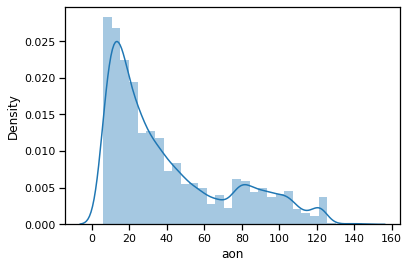

In [57]:
# Analysing the 'aon' variable with respect to the target variable('churn')
sns.distplot(high_val_telecom['aon'],bins=30)
plt.show()

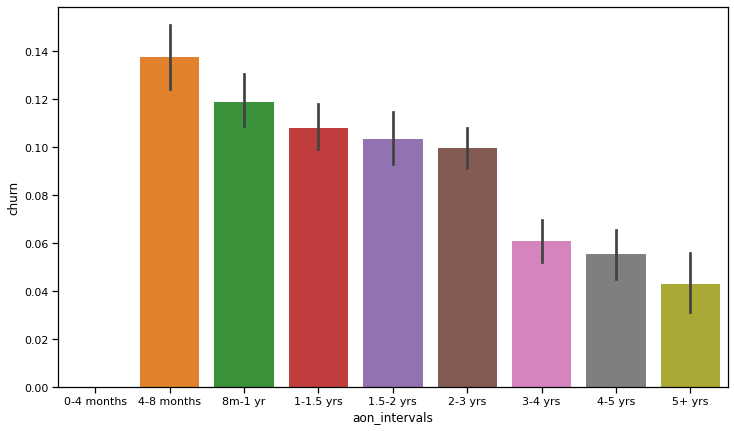

In [58]:
plt.figure(figsize=[12,7])
sns.barplot(x='aon_intervals',y='churn', data=high_val_telecom)
plt.show()

**Observation:** It is apparent that most of ghe customers churn within 8 months. However, as the usage of the network tenure increases, the churn rate is decreased

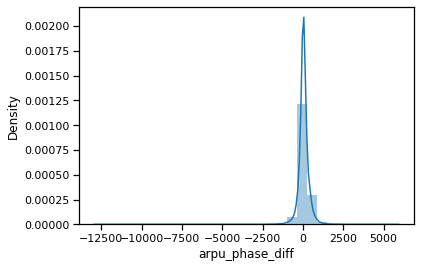

In [59]:
# Analysing the 'arpu_phase_diff' to identify its distribution
sns.distplot(high_val_telecom['arpu_phase_diff'],bins=30)
plt.show()

In [60]:
considered_num_cols = ['total_og_mou_phase_diff','total_ic_mou_phase_diff','total_amt_phase_diff','max_rech_data_phase_diff']

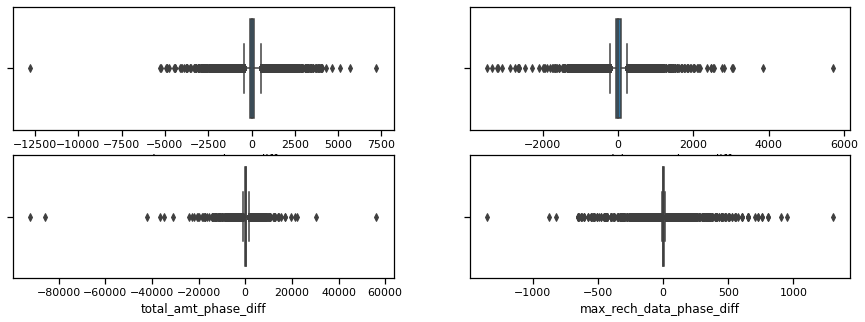

In [61]:
f,ax = plt.subplots(2,2,figsize=[15,5])

sns.boxplot(high_val_telecom['total_og_mou_phase_diff'],ax= ax[0][0])
sns.boxplot(high_val_telecom['total_ic_mou_phase_diff'],ax=ax[0][1])
sns.boxplot(high_val_telecom['total_amt_phase_diff'],ax=ax[1][0])
sns.boxplot(high_val_telecom['max_rech_data_phase_diff'],ax=ax[1][1])
plt.show()

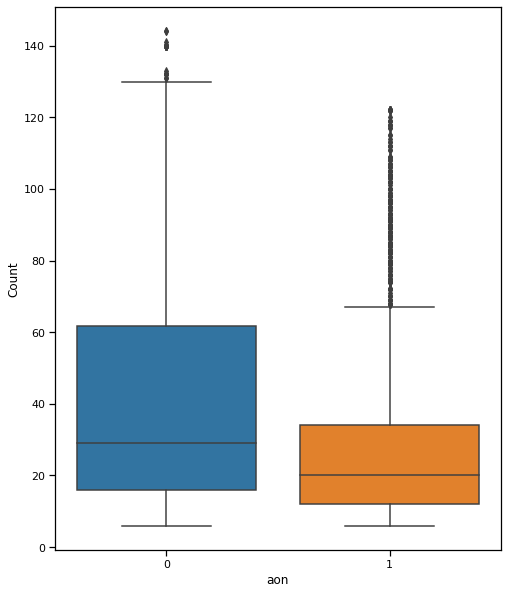

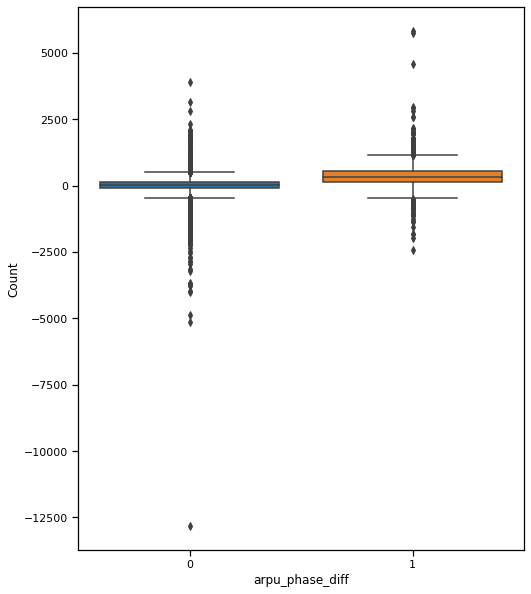

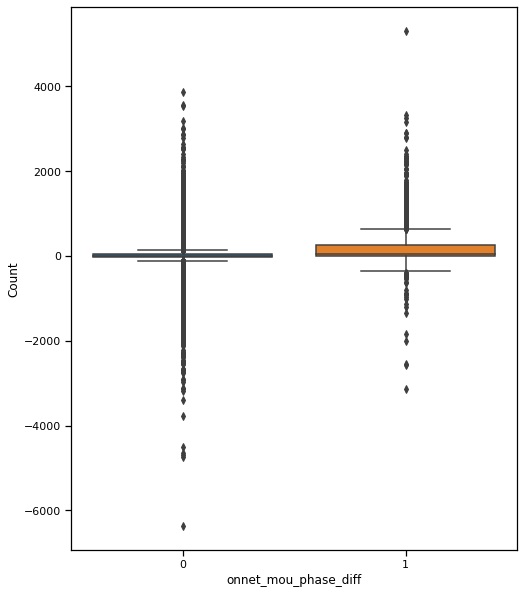

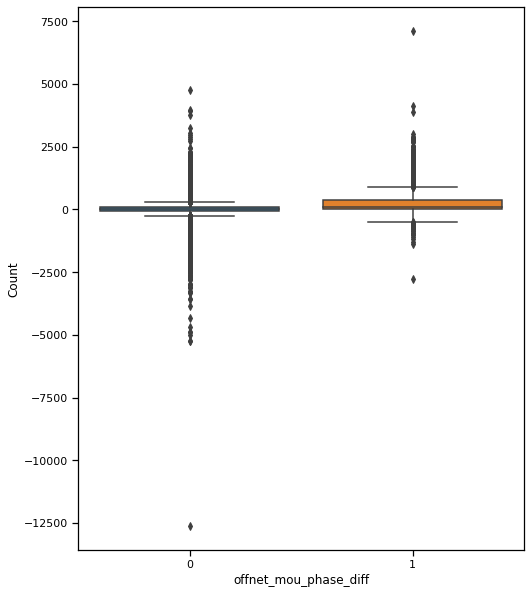

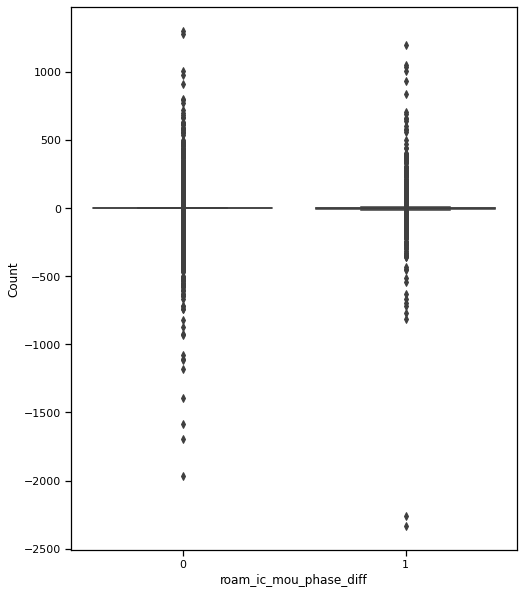

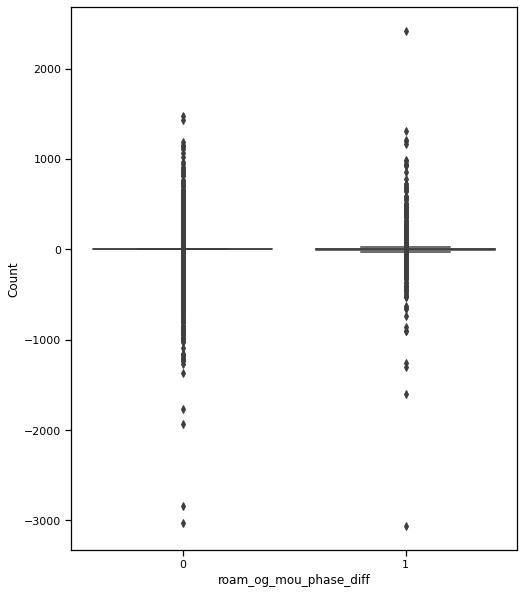

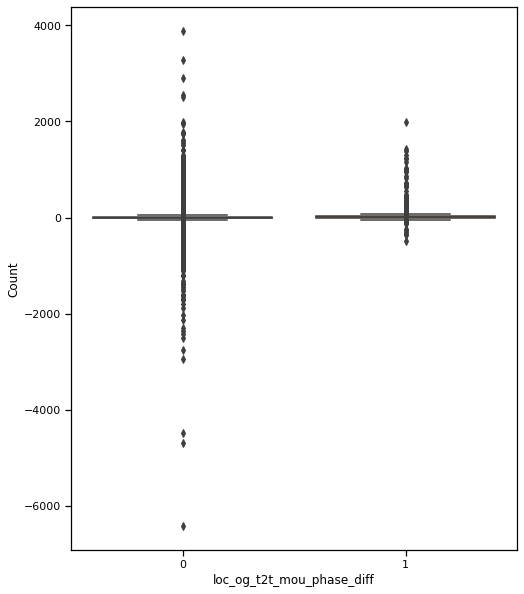

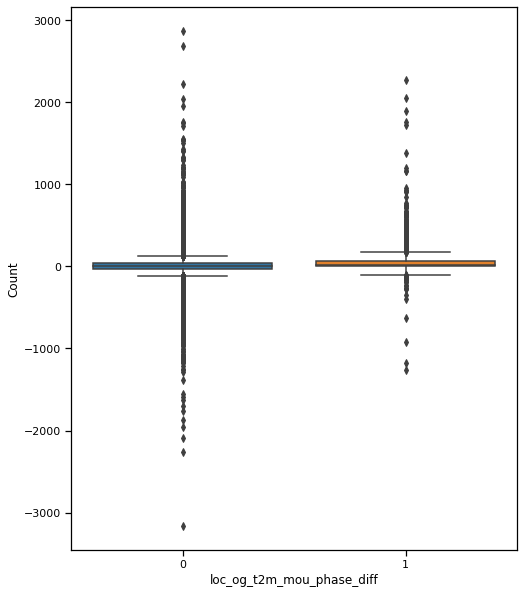

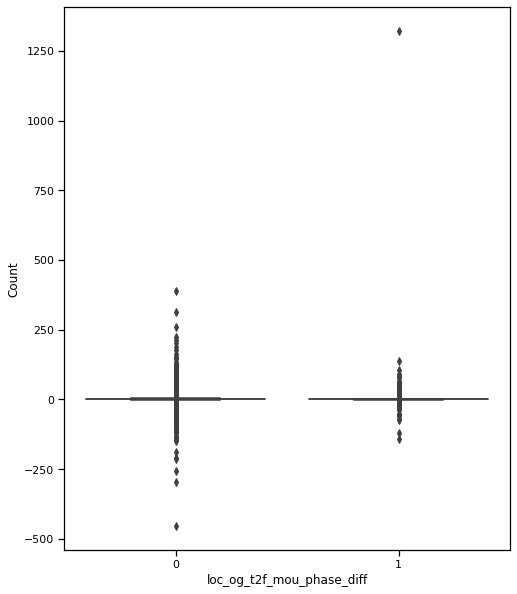

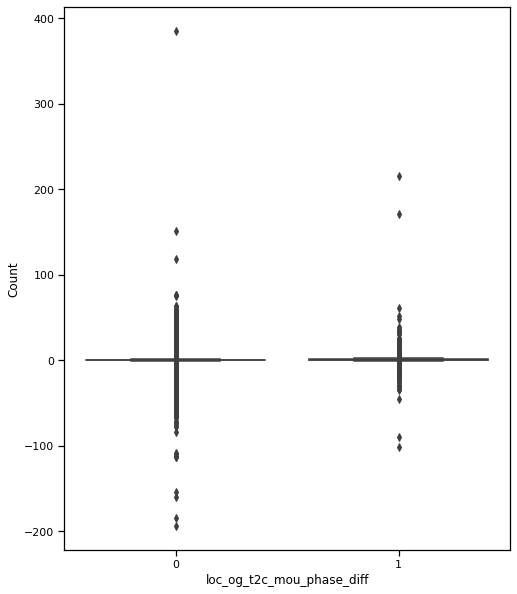

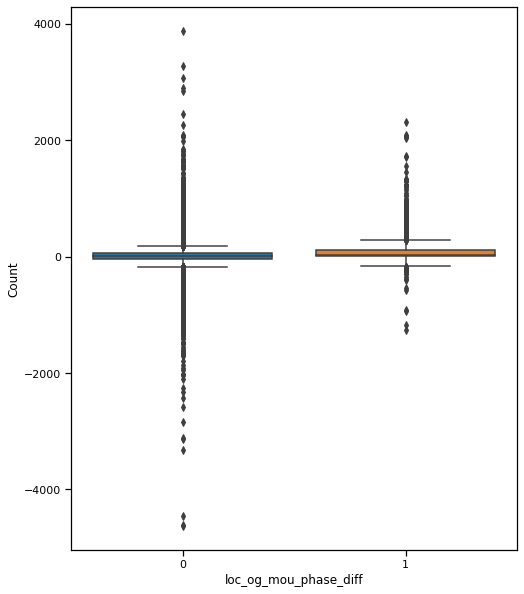

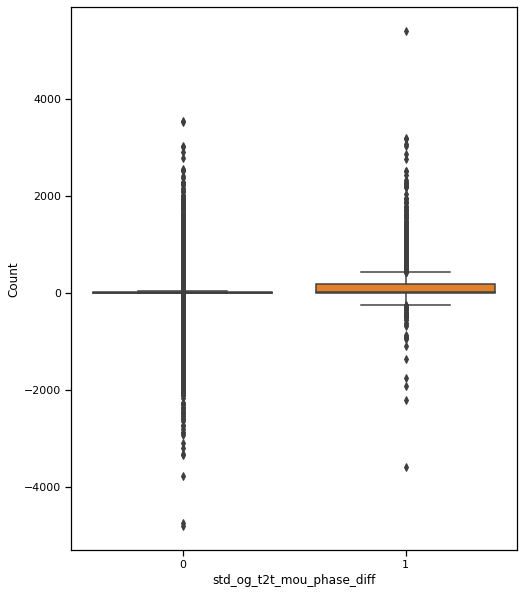

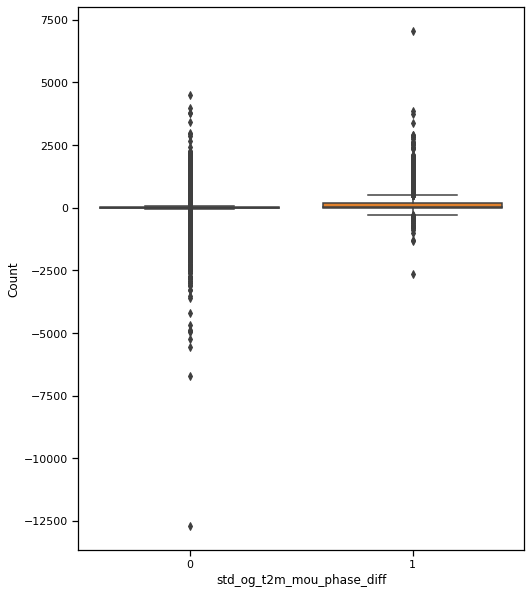

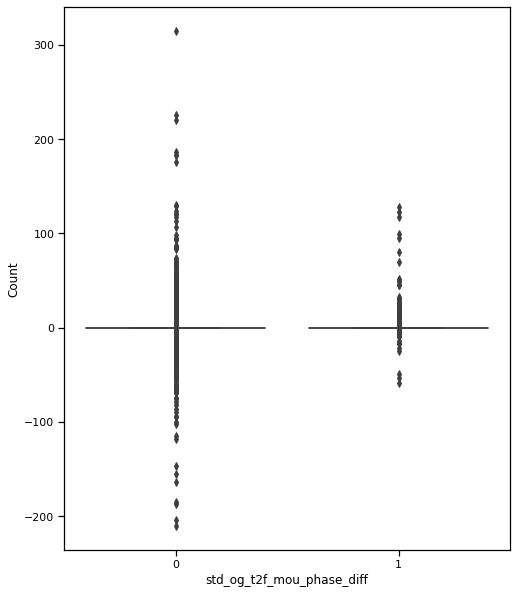

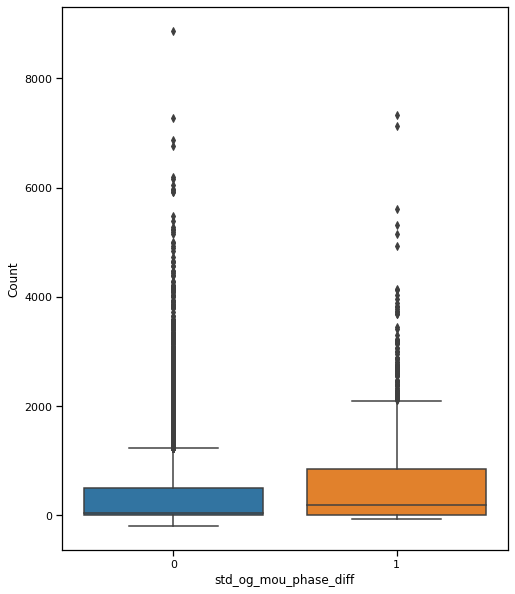

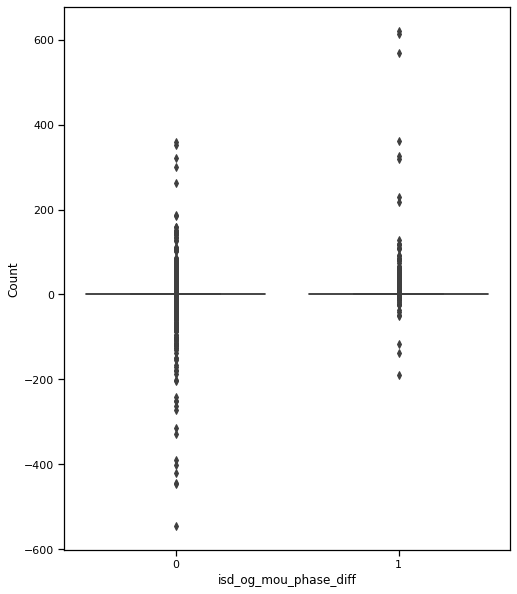

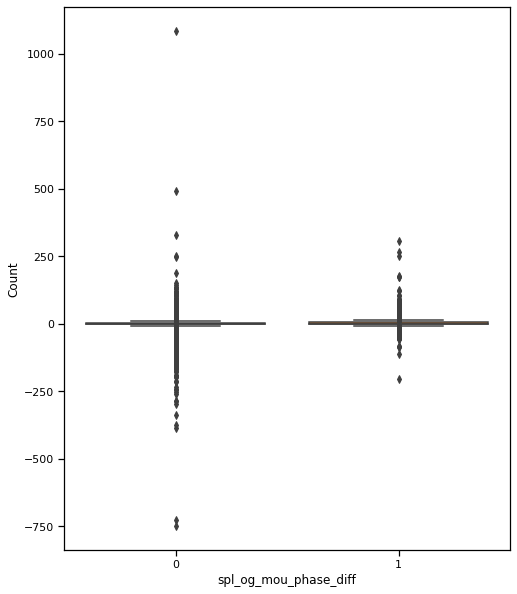

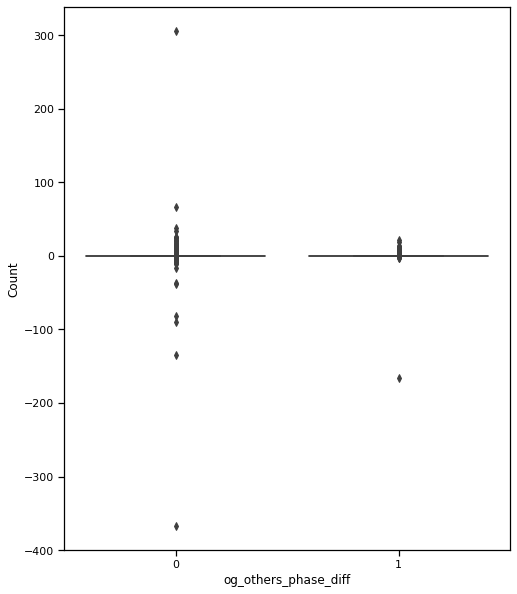

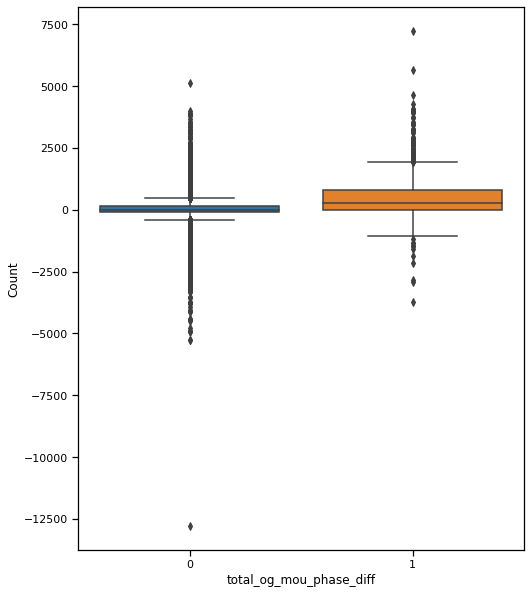

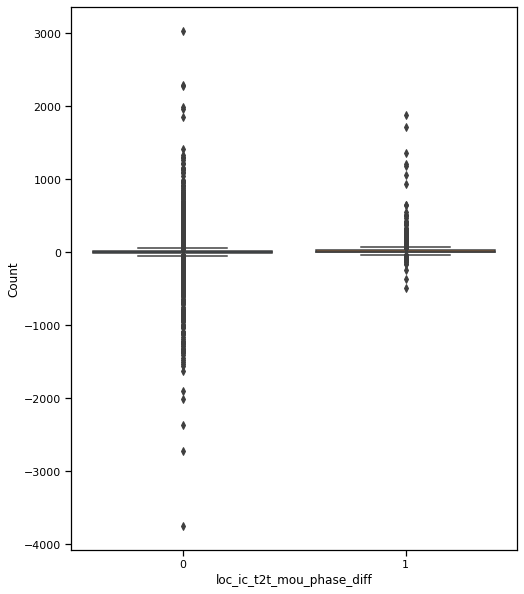

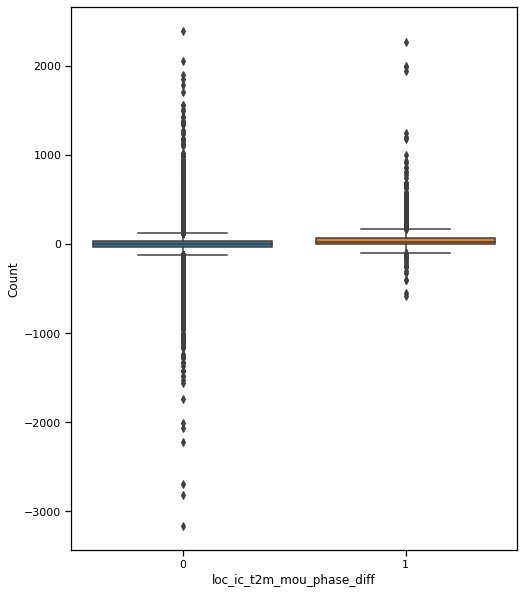

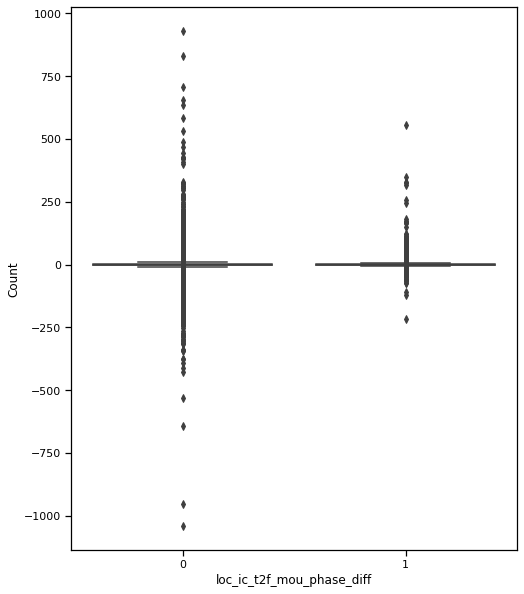

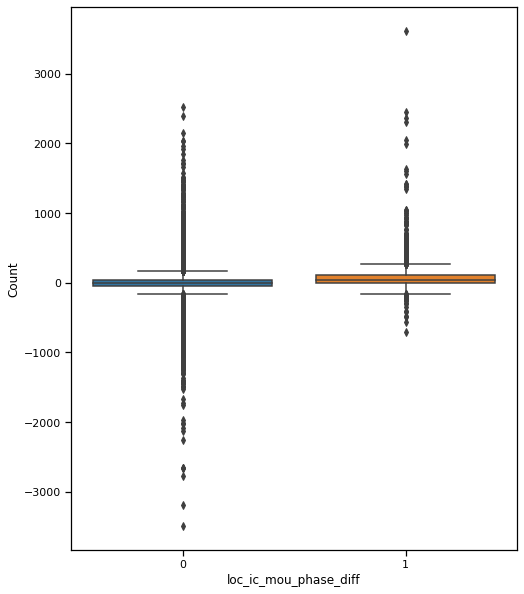

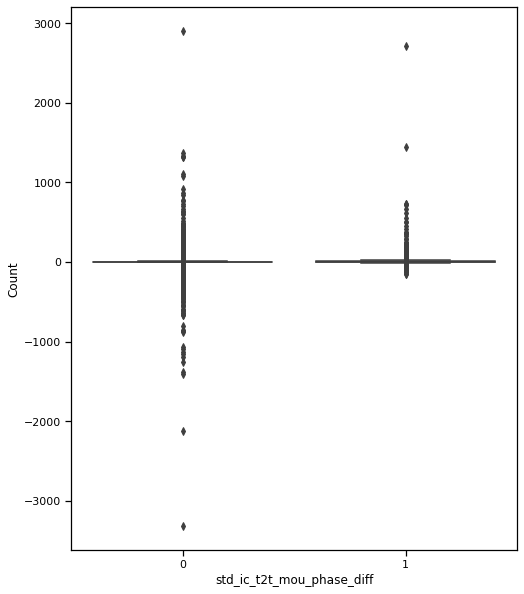

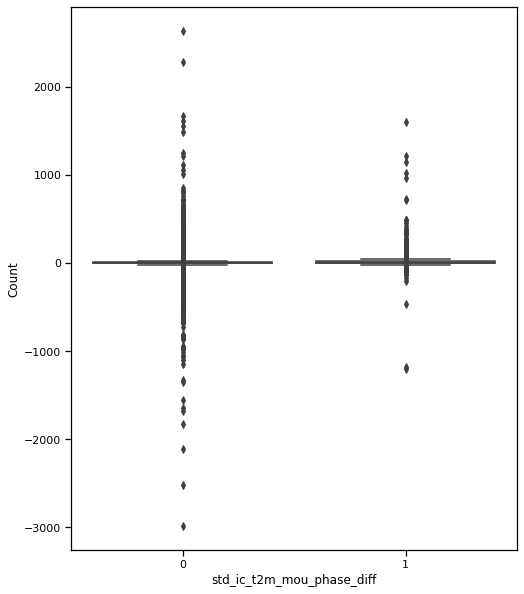

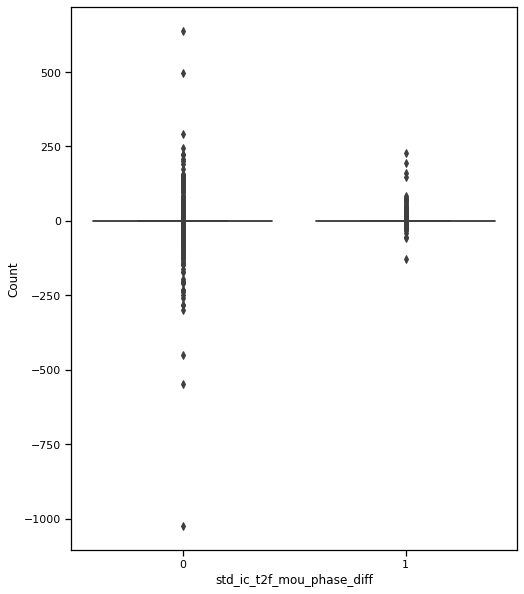

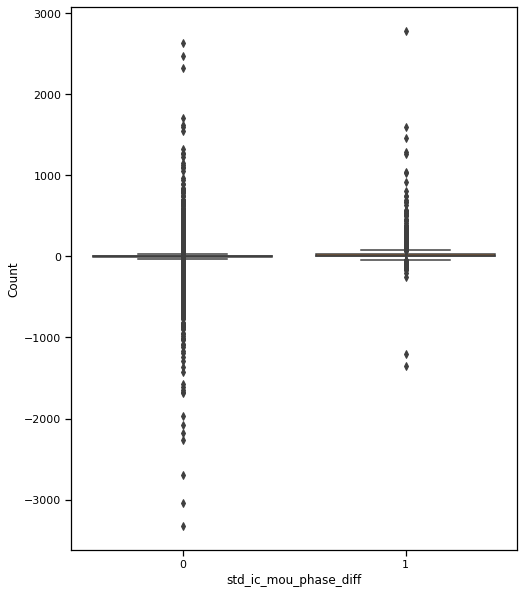

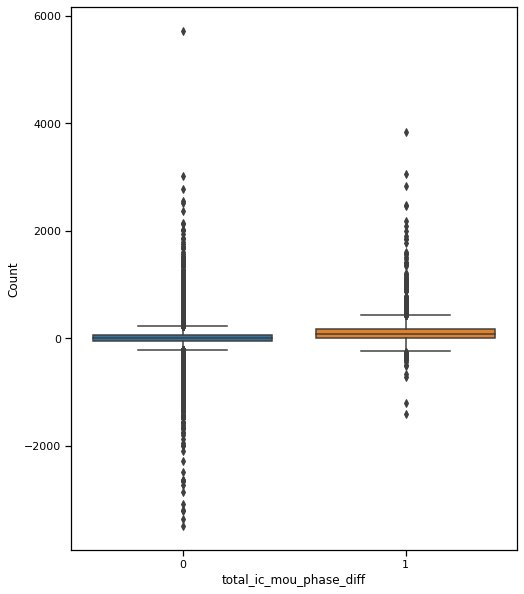

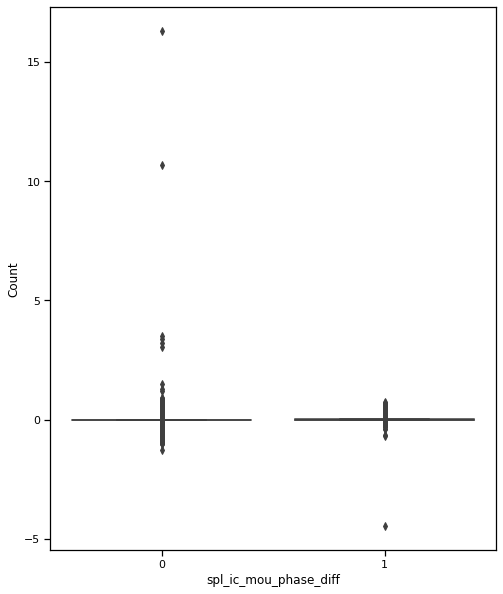

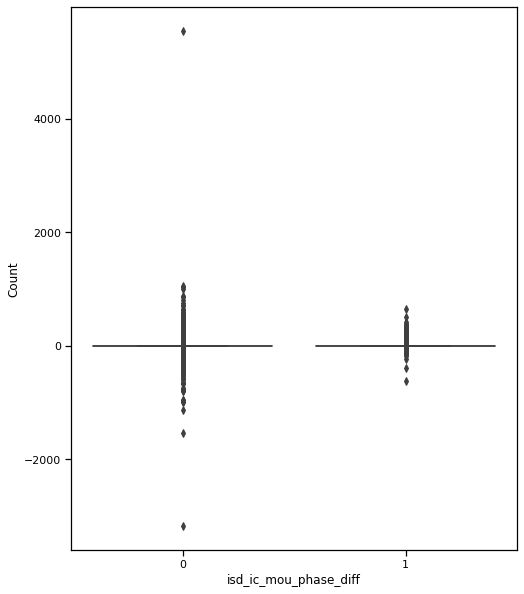

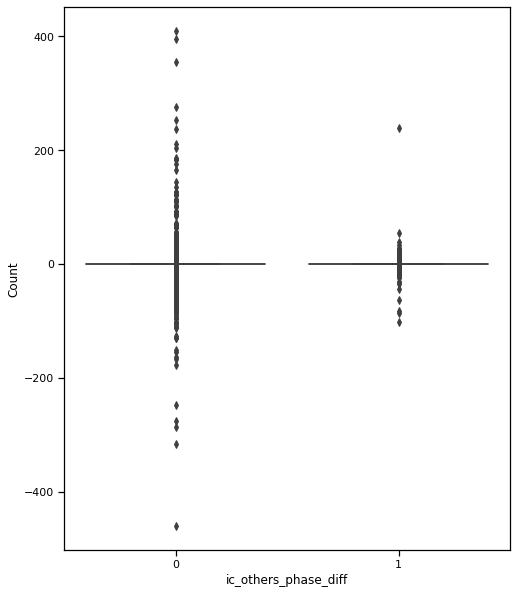

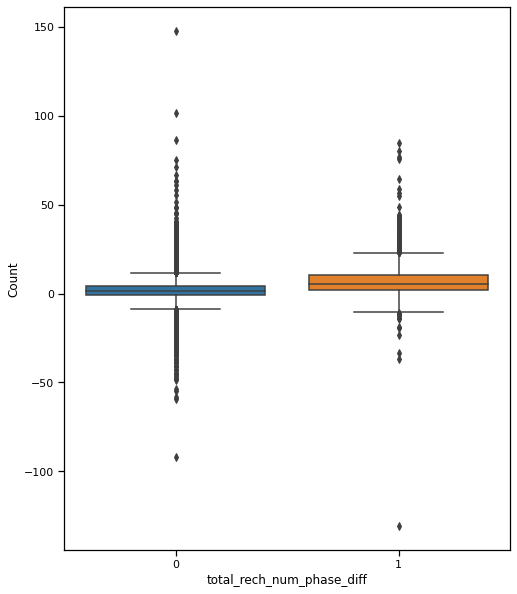

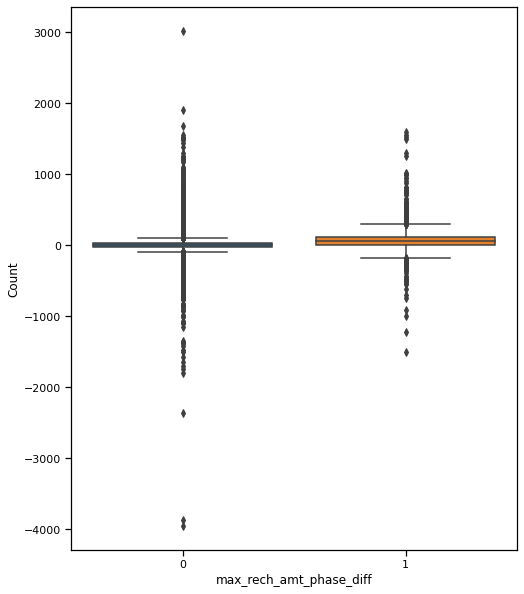

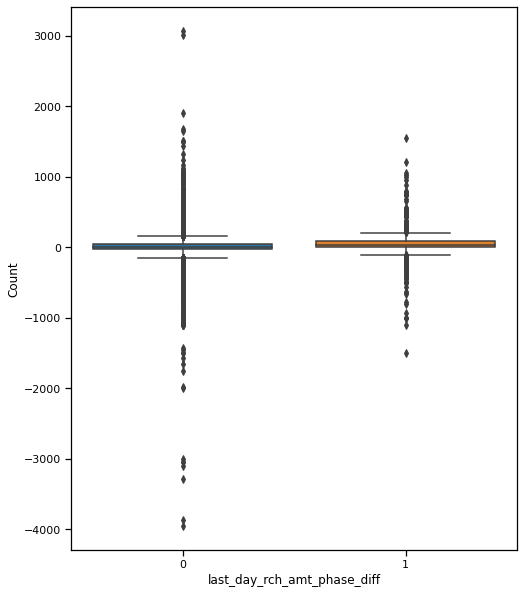

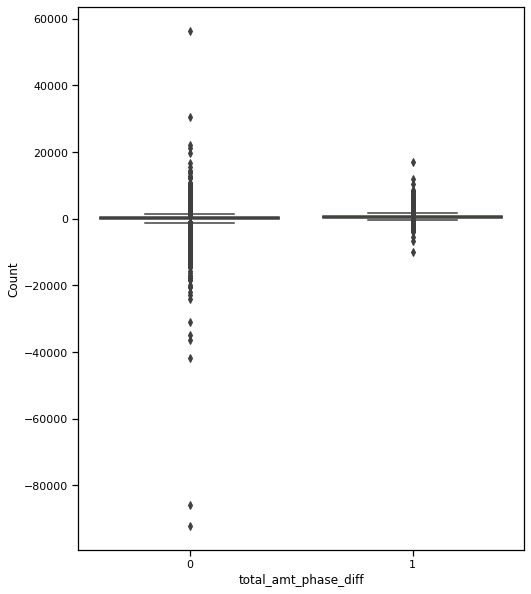

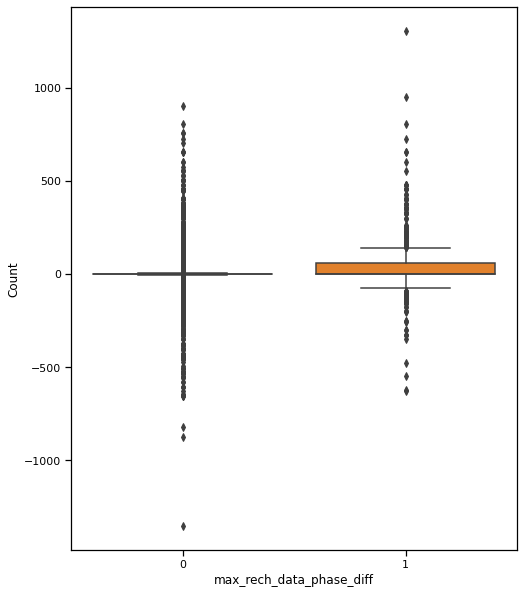

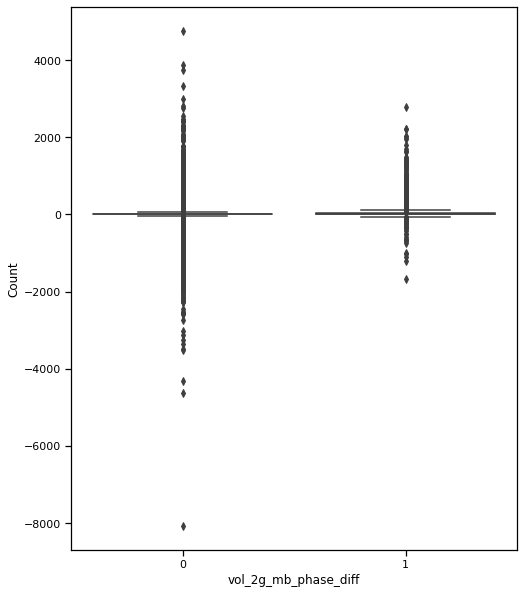

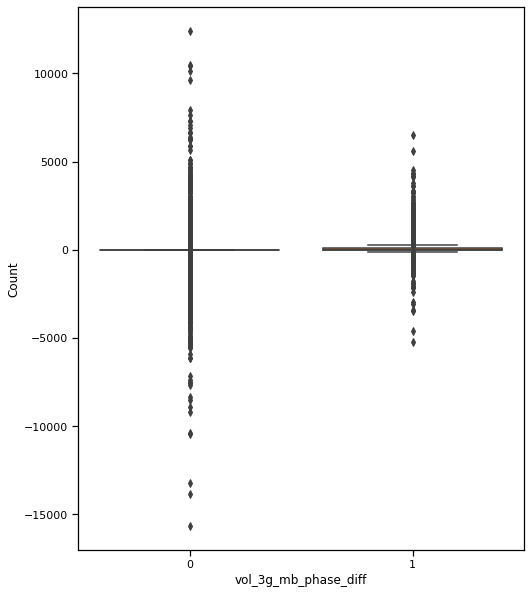

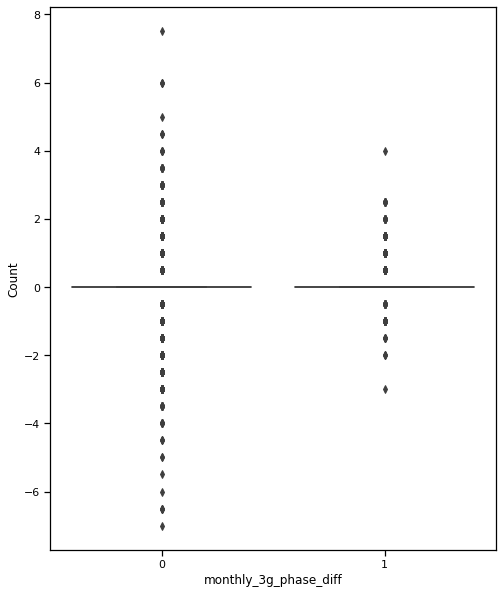

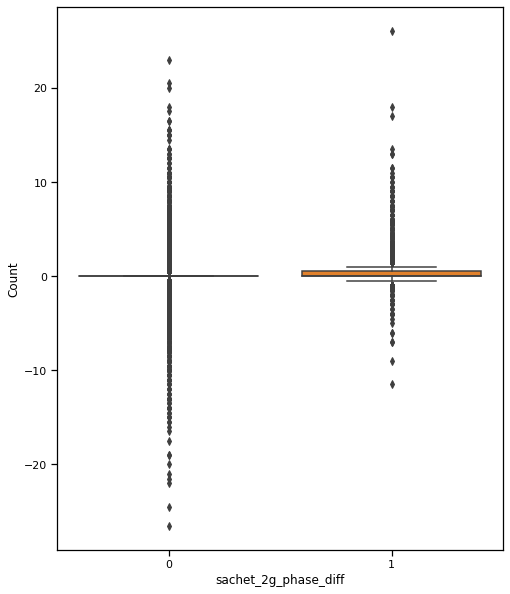

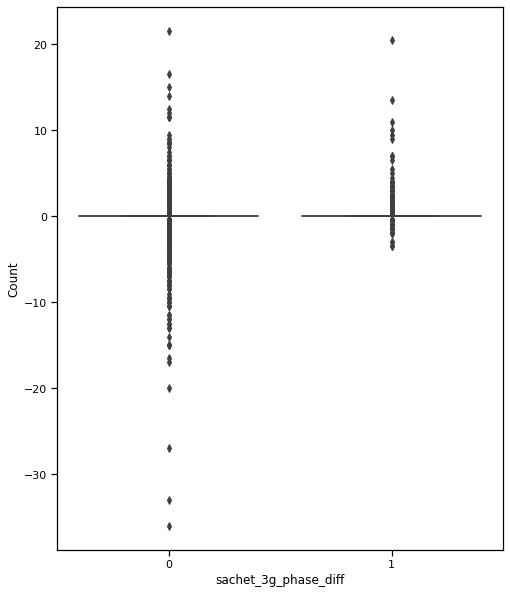

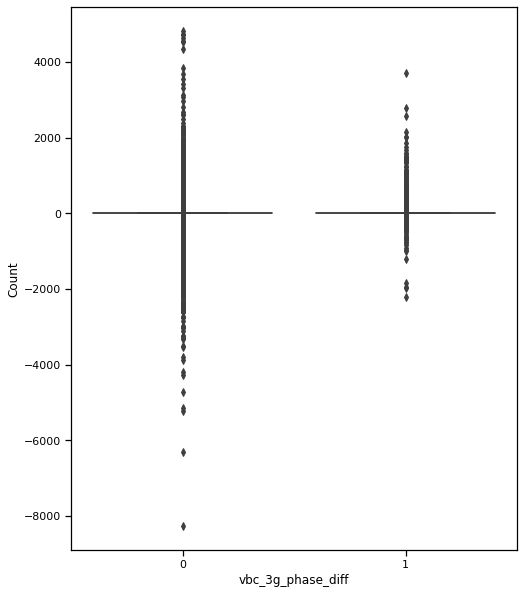

In [62]:
for i in v_num_col_eda:
    plt.figure(figsize=(8,10))
    ax = sns.boxplot("churn",i,data=high_val_telecom)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.show()

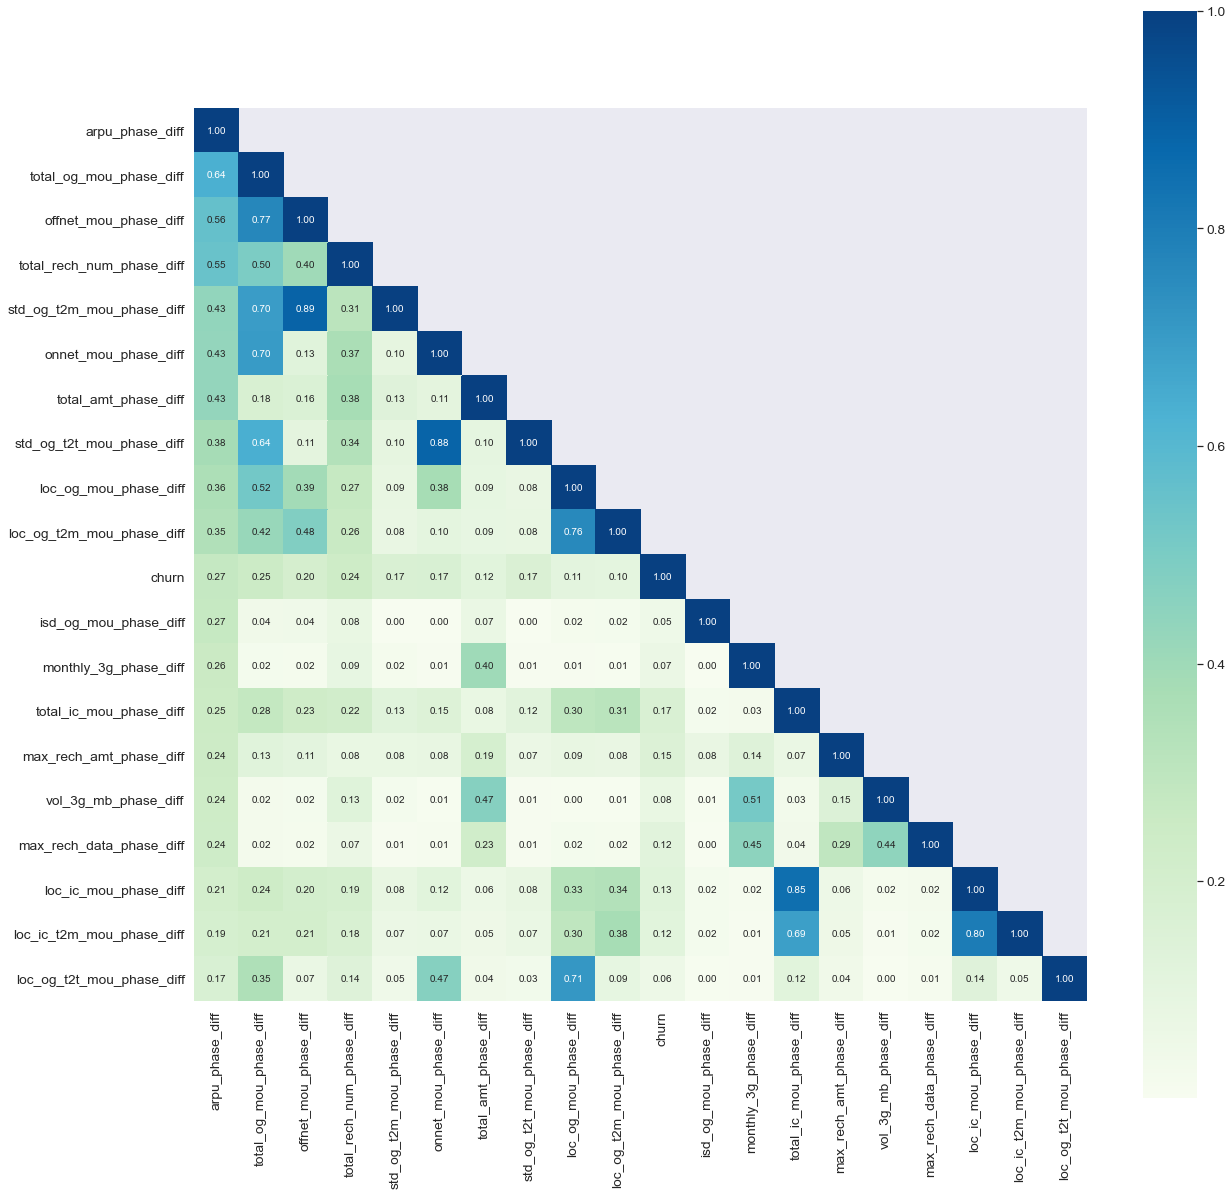

In [63]:
# Checking the top 10 correlated variables
plt.figure(figsize=(20,20))
variables_display = 20 # number of variables for a heatmap
cols = high_val_telecom.corr().nlargest(variables_display,'arpu_phase_diff')['arpu_phase_diff'].index
corr_matrix = np.corrcoef(high_val_telecom[cols].values.T)
sns.set(font_scale=1.25)

corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False
sns.heatmap(corr_matrix,mask = corr_mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values,cmap='GnBu' )
plt.show()

In [64]:
def remove_outliers(col, k=3):
    highest_value = col.mean() + k*col.std()
    lowest_value = col.mean() - k*col.std()
    col[col<lowest_value] = lowest_value
    col[col>highest_value] = highest_value
    return col

In [65]:
high_val_telecom[v_num_col_eda] = high_val_telecom[v_num_col_eda].apply(remove_outliers,axis=0)

**Observation:**
- From univariate analysis, we can see that there is some skewness in a data.
- Bivariate analsis shows that there are significant number of outliers present in a data which needs to be capped.
- There are few variables that are highly collinear. However, these variables can be dropped later in the modelling part if needed.

## Step 4: Modelling

In [66]:
high_val_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   aon                          30001 non-null  float64 
 1   churn                        30001 non-null  int64   
 2   arpu_phase_diff              30001 non-null  float64 
 3   onnet_mou_phase_diff         30001 non-null  float64 
 4   offnet_mou_phase_diff        30001 non-null  float64 
 5   roam_ic_mou_phase_diff       30001 non-null  float64 
 6   roam_og_mou_phase_diff       30001 non-null  float64 
 7   loc_og_t2t_mou_phase_diff    30001 non-null  float64 
 8   loc_og_t2m_mou_phase_diff    30001 non-null  float64 
 9   loc_og_t2f_mou_phase_diff    30001 non-null  float64 
 10  loc_og_t2c_mou_phase_diff    30001 non-null  float64 
 11  loc_og_mou_phase_diff        30001 non-null  float64 
 12  std_og_t2t_mou_phase_diff    30001 non-null  float64 
 13  s

In [67]:
num_cols=high_val_telecom.columns.tolist()

In [68]:
# Removing the 'aon_intervals' column
num_cols.pop()

'aon_intervals'

In [69]:
# Removing the target variable
num_cols.remove('churn')

In [70]:
num_cols

['aon',
 'arpu_phase_diff',
 'onnet_mou_phase_diff',
 'offnet_mou_phase_diff',
 'roam_ic_mou_phase_diff',
 'roam_og_mou_phase_diff',
 'loc_og_t2t_mou_phase_diff',
 'loc_og_t2m_mou_phase_diff',
 'loc_og_t2f_mou_phase_diff',
 'loc_og_t2c_mou_phase_diff',
 'loc_og_mou_phase_diff',
 'std_og_t2t_mou_phase_diff',
 'std_og_t2m_mou_phase_diff',
 'std_og_t2f_mou_phase_diff',
 'std_og_mou_phase_diff',
 'isd_og_mou_phase_diff',
 'spl_og_mou_phase_diff',
 'og_others_phase_diff',
 'total_og_mou_phase_diff',
 'loc_ic_t2t_mou_phase_diff',
 'loc_ic_t2m_mou_phase_diff',
 'loc_ic_t2f_mou_phase_diff',
 'loc_ic_mou_phase_diff',
 'std_ic_t2t_mou_phase_diff',
 'std_ic_t2m_mou_phase_diff',
 'std_ic_t2f_mou_phase_diff',
 'std_ic_mou_phase_diff',
 'total_ic_mou_phase_diff',
 'spl_ic_mou_phase_diff',
 'isd_ic_mou_phase_diff',
 'ic_others_phase_diff',
 'total_rech_num_phase_diff',
 'max_rech_amt_phase_diff',
 'last_day_rch_amt_phase_diff',
 'total_amt_phase_diff',
 'max_rech_data_phase_diff',
 'vol_2g_mb_phase_d

In [71]:
# Creating dummy variables
dummies = pd.get_dummies(high_val_telecom[['aon_intervals']], drop_first=True)
high_val_telecom = pd.concat([high_val_telecom,dummies],axis = 1)

In [72]:
# Deleting the original column
high_val_telecom.drop('aon_intervals',axis=1, inplace = True)

In [73]:
# Train- test split
high_val_telecom_train,high_val_telecom_test = train_test_split(high_val_telecom,train_size =0.7,test_size = 0.3, random_state = 100)

In [74]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [75]:
high_val_telecom_train[num_cols] =scaler.fit_transform(high_val_telecom_train[num_cols])
high_val_telecom_test[num_cols] = scaler.transform(high_val_telecom_test[num_cols])

In [76]:
X_train = high_val_telecom_train.drop('churn',axis = 1)
y_train = high_val_telecom_train['churn']

X_test = high_val_telecom_test.drop('churn',axis = 1)
y_test = high_val_telecom_test['churn']

In [77]:
y_train.value_counts(normalize = True)

0    0.916095
1    0.083905
Name: churn, dtype: float64

#### In order to use SMOTE technique, we will need imbalanced-learn present in our system. Hence used below pip install command to get the same.

In [78]:
!pip install imbalanced-learn

**Observation:** Since the class imbalance is high on the train dataset, class imbalance technique can be perfromed to reduce the imbalance in the data

### Class Imbalance technique - SMOTE

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [81]:
y_train_smote.value_counts(normalize = True)

1    0.5
0    0.5
Name: churn, dtype: float64

In [82]:
print(X_train.shape)
print(X_train_smote.shape)

(21000, 51)
(38476, 51)


**Observation:** Now the class imbalance issue has been resolved and the target variable has balanced ratio of the values

###  Modeling 1: Logistic Regression

Building a model using logistic regression to interpret the important variables for the business outcome

#### Recursive Feature Elimination

In [83]:
logreg = LogisticRegression()

rfe = RFE(estimator= logreg, n_features_to_select =20)
rfe = rfe.fit(X_train_smote,y_train_smote)

In [84]:
# checking the ranking of the columns
sorted(list(zip(X_train_smote.columns,rfe.support_,rfe.ranking_)), key = lambda x: x[2])

[('aon', True, 1),
 ('arpu_phase_diff', True, 1),
 ('std_og_t2t_mou_phase_diff', True, 1),
 ('std_og_t2m_mou_phase_diff', True, 1),
 ('og_others_phase_diff', True, 1),
 ('total_ic_mou_phase_diff', True, 1),
 ('total_rech_num_phase_diff', True, 1),
 ('max_rech_amt_phase_diff', True, 1),
 ('last_day_rch_amt_phase_diff', True, 1),
 ('total_amt_phase_diff', True, 1),
 ('max_rech_data_phase_diff', True, 1),
 ('sachet_2g_phase_diff', True, 1),
 ('aon_intervals_4-8 months', True, 1),
 ('aon_intervals_8m-1 yr', True, 1),
 ('aon_intervals_1-1.5 yrs', True, 1),
 ('aon_intervals_1.5-2 yrs', True, 1),
 ('aon_intervals_2-3 yrs', True, 1),
 ('aon_intervals_3-4 yrs', True, 1),
 ('aon_intervals_4-5 yrs', True, 1),
 ('aon_intervals_5+ yrs', True, 1),
 ('sachet_3g_phase_diff', False, 2),
 ('loc_ic_mou_phase_diff', False, 3),
 ('loc_ic_t2m_mou_phase_diff', False, 4),
 ('loc_ic_t2t_mou_phase_diff', False, 5),
 ('std_og_mou_phase_diff', False, 6),
 ('vol_2g_mb_phase_diff', False, 7),
 ('vbc_3g_phase_diff',

In [85]:
# Considered columns from the RFE method
considered_cols = X_train_smote.columns[rfe.support_]
X_train_rfe = X_train_smote[considered_cols]

In [86]:
X_train_rfe.columns

Index(['aon', 'arpu_phase_diff', 'std_og_t2t_mou_phase_diff',
       'std_og_t2m_mou_phase_diff', 'og_others_phase_diff',
       'total_ic_mou_phase_diff', 'total_rech_num_phase_diff',
       'max_rech_amt_phase_diff', 'last_day_rch_amt_phase_diff',
       'total_amt_phase_diff', 'max_rech_data_phase_diff',
       'sachet_2g_phase_diff', 'aon_intervals_4-8 months',
       'aon_intervals_8m-1 yr', 'aon_intervals_1-1.5 yrs',
       'aon_intervals_1.5-2 yrs', 'aon_intervals_2-3 yrs',
       'aon_intervals_3-4 yrs', 'aon_intervals_4-5 yrs',
       'aon_intervals_5+ yrs'],
      dtype='object')

In [87]:
#Creating a user defined function for calcluating VIF metric

def vif_result(df):
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1]) ]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by="VIF",ascending = False)
    return vif

#### Running first model logm1

In [88]:
X_train_sm = sm.add_constant(X_train_rfe[considered_cols])
logm1 = sm.GLM(y_train_smote,X_train_sm,family = sm.families.Binomial())
model1 = logm1.fit()
print(model1.summary())
vif_result(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38476
Model:                            GLM   Df Residuals:                    38455
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12454.
Date:                Wed, 01 Dec 2021   Deviance:                       24908.
Time:                        21:19:17   Pearson chi2:                 3.61e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,features,VIF
1,arpu_phase_diff,4.45
6,total_rech_num_phase_diff,2.72
9,total_amt_phase_diff,2.69
7,max_rech_amt_phase_diff,1.92
11,sachet_2g_phase_diff,1.71
0,aon,1.54
3,std_og_t2m_mou_phase_diff,1.53
2,std_og_t2t_mou_phase_diff,1.43
8,last_day_rch_amt_phase_diff,1.42
10,max_rech_data_phase_diff,1.36


**Observation:** 
- All the variables are having less multicollinearity and none of the variables are insignificant (p<0.05). Hence, it can be considered as our final model 

#### Checking the accuracy of the model with an arbitrary threshold value

In [89]:
#Checking the accuracy of the final model
y_train_pred = model1.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05800945, 0.53431443, 0.06508516, 0.13414935, 0.26578014,
       0.10139696, 0.41452526, 0.32120646, 0.16324555, 0.6289036 ])

In [90]:
y_train_pred_final = pd.DataFrame({'churn':y_train_smote.values,'churn_prob':y_train_pred})

In [91]:
y_train_pred_final.head()

,churn,churn_prob
0,0,0.058009
1,0,0.534314
2,0,0.065085
3,0,0.134149
4,0,0.265780


In [92]:
# Checking the accuracy of the model witht the initial threshold value set to 0.5
y_train_pred_final["churn_predicted"] = y_train_pred_final.churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,churn_predicted
0,0,0.058009,0
1,0,0.534314,1
2,0,0.065085,0
3,0,0.134149,0
4,0,0.265780,0


In [93]:
# Creating the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final.churn_predicted)
confusion

array([[17356,  1882],
       [ 3564, 15674]], dtype=int64)

In [94]:
print(metrics.accuracy_score(y_train_pred_final.churn,y_train_pred_final.churn_predicted))

0.8584572200852479


#### Metrics beyond accuracy

In [95]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True negative
FP = confusion[0,1] # False positive
FN = confusion[1,0] # False negative

In [96]:
# Sensitivity of the model
TP/float(TP+FN)

0.8147416571369165

In [97]:
# Specificity
TN/float(TN+FP)

0.9021727830335794

In [98]:
# calculating the false positive rate
FP/float(TN+FP)

0.09782721696642063

In [99]:
# Positive predictive values
TP/float(TP+FP) 

0.8928001822738665

In [100]:
# Negative predictive values
TN/float(TN+FN)

0.8296367112810707

It is predominat that the number of people who churn needs to be predicted more accurately. Thus, a balance between sensitivity and specificity is necessary while considering the optimal threshold value

## Analyisng the goodness of model using ROC

Here,
THe optimal threshold value to classify the probability is perfomed using the ROC curve concept

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

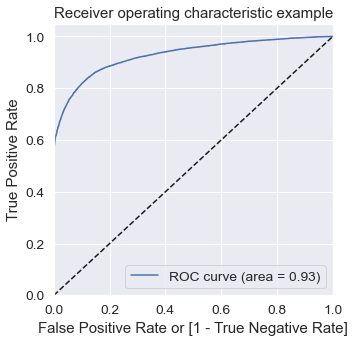

In [102]:
draw_roc(y_train_pred_final.churn,y_train_pred_final.churn_prob)

**Observation:** The Area under the curve(AUC) for the ROC graph is good and hence, the model can be considered an optimal model 

## Finding the optimal cutoff point

Optimal cutoff point is where we get a decently higher sensitivity and specificity

In [103]:
# Predicting the probabilities on different cutoff values
cutoff_vals = [float(i)/10 for i in range(10) ]

for val in cutoff_vals:
    y_train_pred_final[val] = y_train_pred_final.churn_prob.map(lambda x: 1 if x >val else 0)

In [104]:
y_train_pred_final.head()

,churn,churn_prob,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.058009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.534314,1,1,1,1,1,1,1,0,0,0,0
2,0,0.065085,0,1,0,0,0,0,0,0,0,0,0
3,0,0.134149,0,1,1,0,0,0,0,0,0,0,0
4,0,0.265780,0,1,1,1,0,0,0,0,0,0,0


In [105]:
# calculating accuracy, sensitivity and specificity for each cutoff probabilities

cutoff_df = pd.DataFrame(columns= ["cutoff","accuracy","sensitivity","specificity"])

for val in cutoff_vals:
    c_matrix = metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final[val])
    total = sum(sum(c_matrix))
    
    accuracy = (c_matrix[0,0]+c_matrix[1,1])/total
    sensitivity = c_matrix[1,1]/(c_matrix[1,0]+c_matrix[1,1])
    specificity = c_matrix[0,0]/(c_matrix[0,0]+c_matrix[0,1])
    cutoff_df.loc[val] = [val,accuracy,sensitivity,specificity]

In [106]:
print(cutoff_df)

     cutoff  accuracy  sensitivity  specificity
0.0     0.0  0.500000     1.000000     0.000000
0.1     0.1  0.678423     0.972450     0.384395
0.2     0.2  0.780227     0.935700     0.624753
0.3     0.3  0.831791     0.897650     0.765932
0.4     0.4  0.856300     0.861420     0.851180
0.5     0.5  0.858457     0.814742     0.902173
0.6     0.6  0.852090     0.764477     0.939703
0.7     0.7  0.837977     0.709949     0.966005
0.8     0.8  0.817912     0.651835     0.983990
0.9     0.9  0.795535     0.594656     0.996413


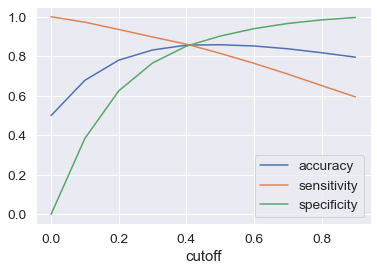

In [107]:
# plotting the accuracy,sensitivity and specificity of the considered cutoff values
cutoff_df.plot.line(x = "cutoff", y = ["accuracy","sensitivity","specificity"] )
plt.show()

**Observation:** It is apparent from the above plot that the optimum balanced cutoff can be 0.42

In [108]:
# classifying the probabilities based on the identified optimal cutoff around'0.4'
y_train_pred_final["final_predicted"] = y_train_pred_final.churn_prob.map(lambda x: 1 if x>0.42 else 0)

In [109]:
y_train_pred_final.head()

,churn,churn_prob,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.058009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.534314,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.065085,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.134149,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.265780,0,1,1,1,0,0,0,0,0,0,0,0


In [110]:
# Checking the accuracy of the optimal threshold
metrics.accuracy_score(y_train_pred_final.churn,y_train_pred_final.final_predicted)

0.8574176109782722

In [111]:
# Checking the confusion matrix for the final model
confusion_final = metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final.final_predicted)

TN = confusion_final[0,0] # True Negative
FP = confusion_final[0,1] # False Positive
FN = confusion_final[1,0] # False Negative
TP = confusion_final[1,1] # True Positive

In [112]:
# Sensitivity of the final predictions
TP/float(TP+FN)

0.8517517413452542

In [113]:
# Specificity of the final predictions
TN/float(TN+FP)

0.8630834806112901

In [114]:
# False positive rate 
FP/float(TN+FP)

0.13691651938870986

In [115]:
# Positive predicitve values also known
TP/float(TP+FP)

0.8615141955835962

In [116]:
# Negative predictive values
TN/float(TN+FN)

0.8534128289473685

### Precision and recall Perspective to analyse optimal cutoff

In [117]:
precision_score(y_train_pred_final.churn,y_train_pred_final.churn_predicted)

0.8928001822738665

In [118]:
recall_score(y_train_pred_final.churn,y_train_pred_final.churn_predicted)

0.8147416571369165

In [119]:
precision,recall,thresholds = precision_recall_curve(y_train_pred_final.churn,y_train_pred_final.churn_prob)

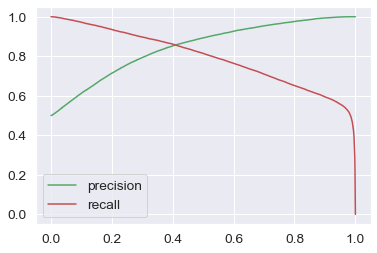

In [120]:
plt.plot(thresholds,precision[:-1],"-g",label="precision")
plt.plot(thresholds,recall[:-1],"-r",label="recall")
plt.legend()
plt.show()

**Observation:** From the plot of precision_recall curve, the optimal value to have a balance between the precision and recall is 0.42 which is the same threshold value identified from the ROC curve. Thus, considering 0.42 as final threshold for further steps

In [121]:
# Precision on final cutoff
precision_score(y_train_pred_final.churn,y_train_pred_final.final_predicted)

0.8615141955835962

In [122]:
# Recall on final cutoff of train data
recall_score(y_train_pred_final.churn,y_train_pred_final.final_predicted)

0.8517517413452542

## Making predicitons on test data

In [123]:
# Splitting the test data into x and y

X_test = X_test[X_train_rfe.columns]

X_test.head()

,aon,arpu_phase_diff,std_og_t2t_mou_phase_diff,std_og_t2m_mou_phase_diff,og_others_phase_diff,total_ic_mou_phase_diff,total_rech_num_phase_diff,max_rech_amt_phase_diff,last_day_rch_amt_phase_diff,total_amt_phase_diff,max_rech_data_phase_diff,sachet_2g_phase_diff,aon_intervals_4-8 months,aon_intervals_8m-1 yr,aon_intervals_1-1.5 yrs,aon_intervals_1.5-2 yrs,aon_intervals_2-3 yrs,aon_intervals_3-4 yrs,aon_intervals_4-5 yrs,aon_intervals_5+ yrs
6102,-0.566318,0.716038,-0.060896,-0.113510,-0.313615,0.105097,0.976974,-0.178628,-0.572474,0.310543,-0.092652,-0.056597,0,0,0,1,0,0,0,0
2539,-0.503180,0.043930,-0.079973,-0.117796,-0.313615,0.027620,0.377919,-0.114629,0.059889,0.448387,-0.151633,2.187285,0,0,0,1,0,0,0,0
21576,-1.008281,0.144855,-0.223585,-0.708865,0.734419,-0.028837,0.035602,-0.242628,0.087185,0.314627,1.588317,-0.056597,1,0,0,0,0,0,0,0
19574,0.001921,-0.135181,-0.015603,0.070576,-0.313615,0.954378,-0.820192,-0.090014,-0.172129,-0.094313,-0.092652,-0.056597,0,0,0,0,0,1,0,0
12804,0.380746,1.244718,2.486696,0.000153,-0.287544,1.828628,2.003926,0.343210,-0.081142,0.758793,2.178131,0.584512,0,0,0,0,0,0,1,0


In [124]:
# Predicting the y_test 

X_test_sm = sm.add_constant(X_test)
y_test_pred_prob = model1.predict(X_test_sm)

In [125]:
y_test_df = pd.DataFrame(columns = ["churn","Probability","Predicted"])
y_test_df["churn"] = y_test
y_test_df["Probability"] = y_test_pred_prob
y_test_df["Predicted"] = y_test_df["Probability"].map(lambda x: 1 if x>0.42 else 0)

#### Evaluating the model on test data

In [126]:
# Accuracy of the model on the test data

metrics.accuracy_score(y_test_df.churn,y_test_df.Predicted)

0.8453505166092656

In [127]:
confusion_test = metrics.confusion_matrix(y_test_df.churn,y_test_df.Predicted)
confusion_test

array([[7112, 1112],
       [ 280,  497]], dtype=int64)

In [128]:
TN = confusion_test[0,0] # True Negative
FP = confusion_test[0,1] # False Positive
FN = confusion_test[1,0] # False Negative
TP = confusion_test[1,1] # True Positive

In [129]:
# Sensitivity of model on the test data
TP/float(TP+FN)

0.6396396396396397

In [130]:
# Specificity of the final predictions
TN/float(TN+FP)

0.8647859922178989

In [131]:
# False positive rate 
FP/float(TN+FP)

0.13521400778210116

In [132]:
# Positive predicitve values
TP/float(TP+FP)

0.3088875077688005

In [133]:
# Negative predictive values
TN/float(TN+FN)

0.9621212121212122

In [134]:
# precision of the model on the test data
precision_score(y_test_df.churn,y_test_df.Predicted)

0.3088875077688005

In [135]:
# Recall of the model on the test data
recall_score(y_test_df.churn,y_test_df.Predicted)

0.6396396396396397

**Summary:**
The variables with positive coefficient indicate that there is higher chance for the customers to churn and vice-verse.

## Modeling 2: Logistic Regression using PCA

This model is used to predict if the high value customers will churn or not

In [136]:
# Train- test split
high_val_telecom_train,high_val_telecom_test = train_test_split(high_val_telecom,train_size =0.7,test_size = 0.3, random_state = 100)

In [137]:
# Scaling the dataset
scaler = StandardScaler()

In [138]:
high_val_telecom_train[num_cols] =scaler.fit_transform(high_val_telecom_train[num_cols])
high_val_telecom_test[num_cols] = scaler.transform(high_val_telecom_test[num_cols])

In [139]:
X_train = high_val_telecom_train.drop('churn',axis = 1)
y_train = high_val_telecom_train['churn']

X_test = high_val_telecom_test.drop('churn',axis = 1)
y_test = high_val_telecom_test['churn']

In [140]:
y_train.value_counts(normalize = True)

0    0.916095
1    0.083905
Name: churn, dtype: float64

### Class Imbalance technique - SMOTE

In [141]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [142]:
y_train_smote.value_counts(normalize = True)

1    0.5
0    0.5
Name: churn, dtype: float64

In [143]:
# importing PCA Library
from sklearn.decomposition import PCA

In [144]:
# Initializing the PCA object
pca = PCA(random_state=42)

# Applying PCA on the train data
pca.fit(X_train_smote)

PCA(random_state=42)

In [145]:
# Fitting the train and test model
X_train_smote_pca=pca.fit_transform(X_train_smote)
X_test_pca=pca.transform(X_test)

In [146]:
# Displaying the PCA components
pca.components_

array([[ 0.04771659, -0.32661942, -0.26100608, ...,  0.00628066,
         0.00465493,  0.00356312],
       [ 0.01360959, -0.14507446,  0.19535006, ...,  0.00517994,
         0.00454801,  0.00125937],
       [-0.08005024,  0.19635868,  0.21702646, ..., -0.00269945,
        -0.00448687, -0.00323681],
       ...,
       [-0.00378216, -0.02109152, -0.52638257, ...,  0.00640052,
         0.00250141,  0.05246548],
       [ 0.00125234, -0.01488742,  0.21966071, ...,  0.00975138,
         0.00617728,  0.02788186],
       [-0.00170947, -0.01447343,  0.21880994, ..., -0.00445032,
         0.00655698,  0.00612579]])

In [147]:
# Viewing the explained ration for each component
pca.explained_variance_ratio_

array([0.19818622, 0.07628346, 0.06687498, 0.05383458, 0.04810568,
       0.04538538, 0.04070197, 0.03687993, 0.02817269, 0.02696027,
       0.02508979, 0.02259454, 0.0223006 , 0.02099761, 0.01992922,
       0.01948466, 0.01832492, 0.0179717 , 0.01709067, 0.01639816,
       0.01608892, 0.01577949, 0.01547708, 0.01397509, 0.01326886,
       0.01232297, 0.01173442, 0.0108055 , 0.00935396, 0.00920907,
       0.00827723, 0.00738655, 0.00707725, 0.00533686, 0.00395777,
       0.00264023, 0.00262618, 0.00224233, 0.00185604, 0.00153647,
       0.00131423, 0.00124261, 0.00090843, 0.00090641, 0.00059939,
       0.00056217, 0.00049872, 0.00046038, 0.00042431, 0.00030172,
       0.00026234])

In [148]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

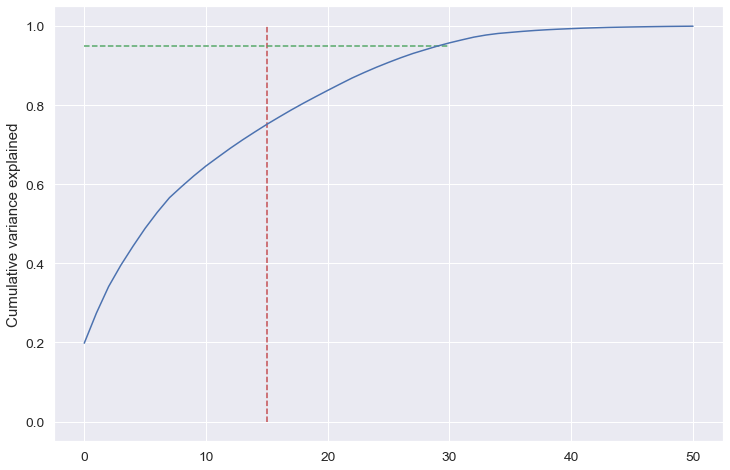

In [149]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**Observation**:PCA can be performed with 29 components

In [150]:
# Importing Incremental PCA package
from sklearn.decomposition import IncrementalPCA

In [151]:
pca_final = IncrementalPCA(n_components=29)

In [152]:
df_train_pca = pca_final.fit_transform(X_train_smote)

In [153]:
df_train_pca.shape

(38476, 29)

In [154]:
corr_matrix = np.corrcoef(df_train_pca.transpose())

In [155]:
corr_matrix.shape

(29, 29)

#### Plotting the heatmap for the PCA

In [156]:
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

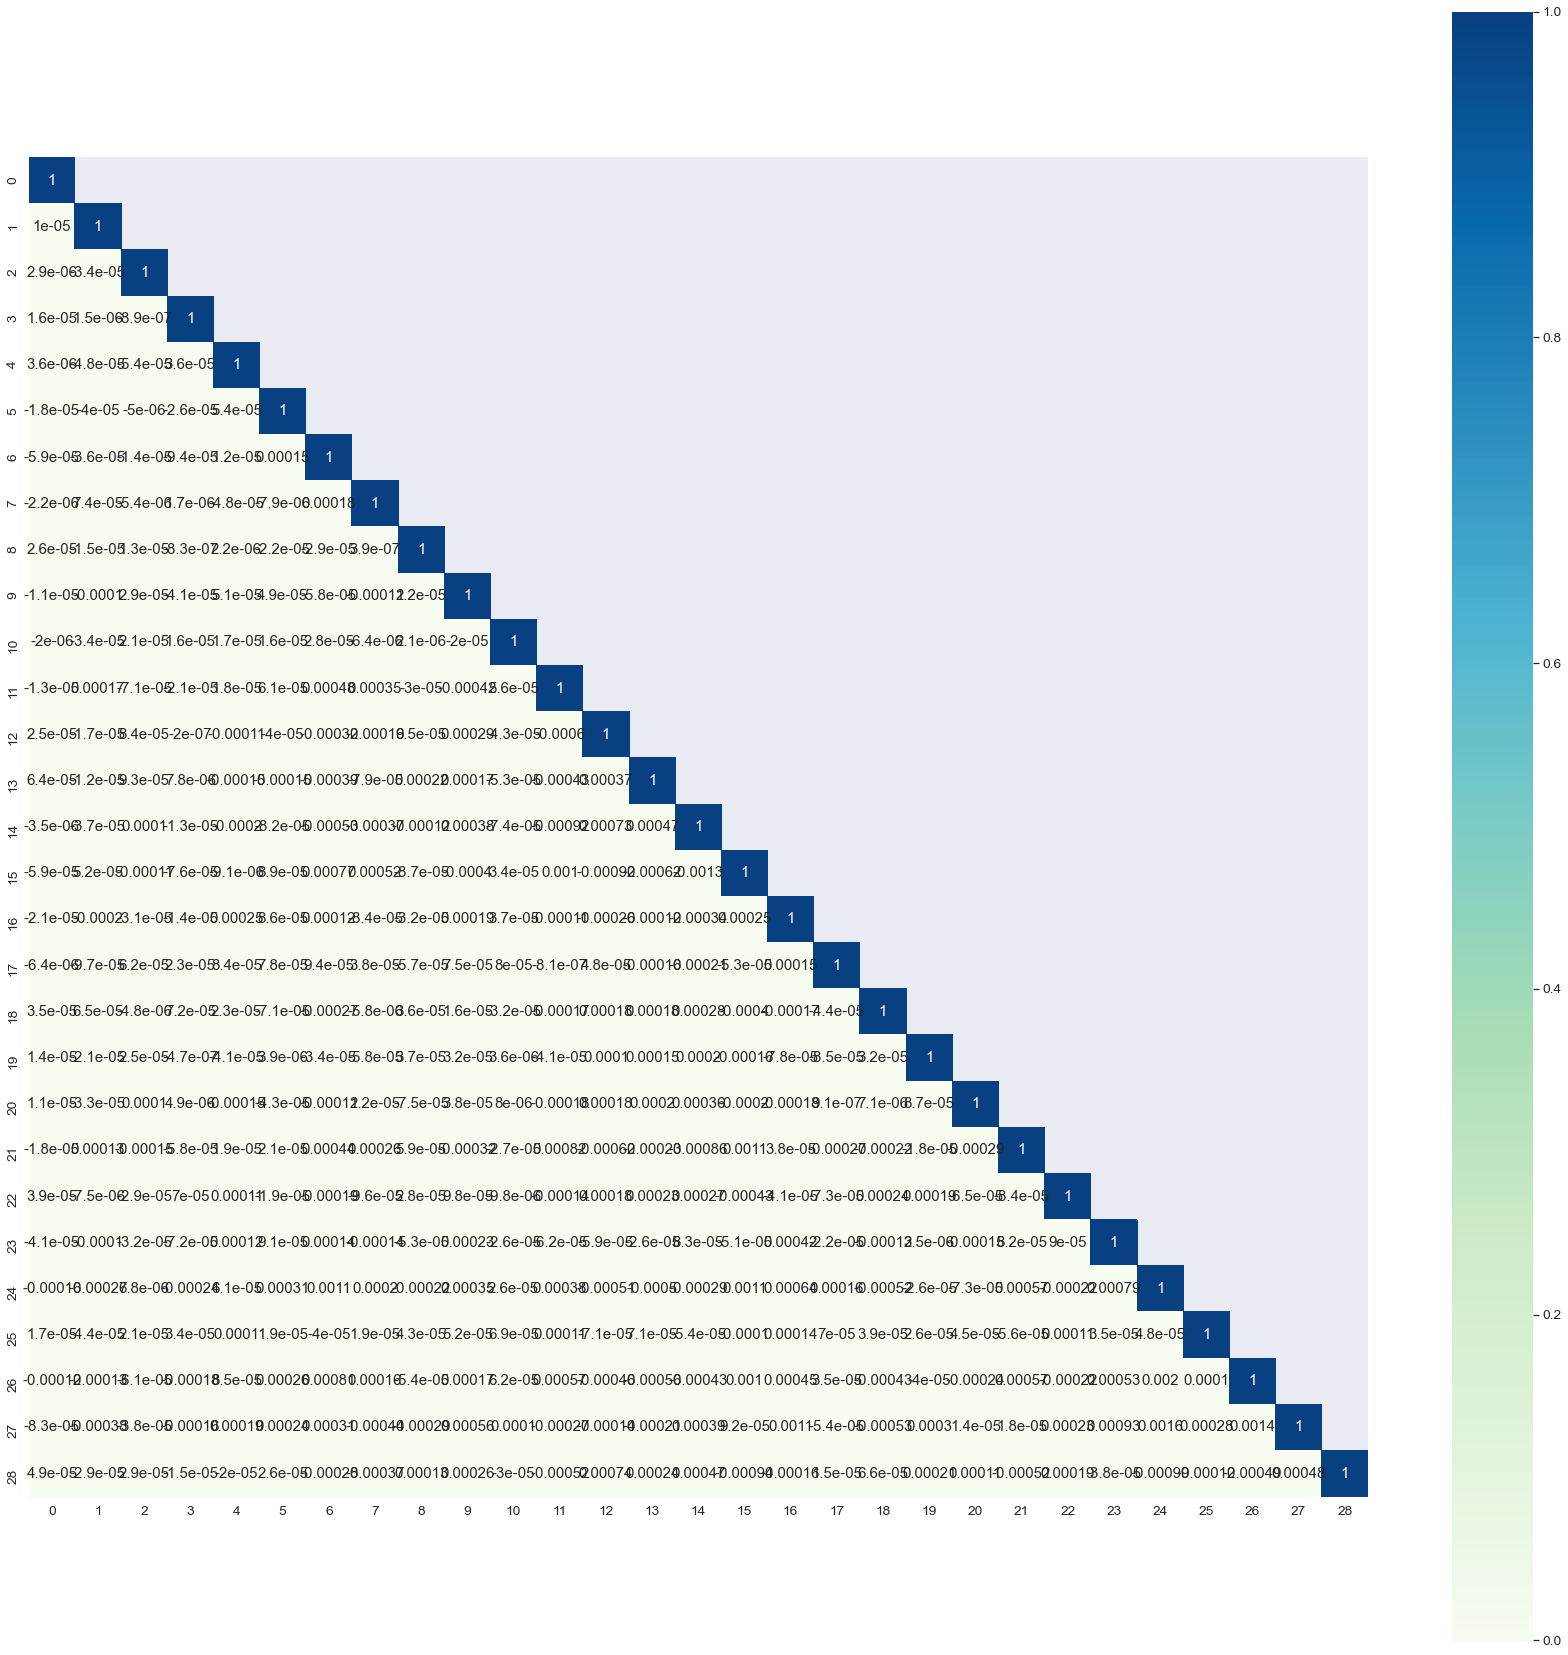

In [157]:
plt.figure(figsize=[30,30])
sns.heatmap(corr_matrix,mask = corr_mask, square = True,annot = True,cmap='GnBu')
plt.show()

In [158]:
# Applying transformation on the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 29)

#### Buidling Logistic regression Model using PCA

In [159]:
churn_pca = LogisticRegression()

In [160]:
model_pca = churn_pca.fit(df_train_pca, y_train_smote)

In [161]:
# Making predictions on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

Making a Logistic regression model with PCA considereing 90% variance

In [162]:
pca_var = PCA(0.9)

In [163]:
df_train_pca_var = pca_var.fit_transform(X_train_smote)

In [164]:
df_train_pca_var.shape

(38476, 26)

In [165]:
churn_pca2 = LogisticRegression()

In [166]:
model_pca2 = churn_pca.fit(df_train_pca_var, y_train_smote)

In [167]:
# Applying PCA on the test data
df_test_pca2 = pca_var.transform(X_test)

In [168]:
df_test_pca2.shape

(9001, 26)

In [169]:
# Taking the probabilities of test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [170]:
# Checking the ROC score
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.84'

#### Evaluating other metrics

In [171]:
y_test_pred = model_pca2.predict(df_test_pca2)

In [172]:
# converting the prediction into a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
print("Dimension of y_test_pred_df: ", y_test_pred_df.shape)

Dimension of y_test_pred_df:  (9001, 1)


In [173]:
# Importing library for confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

In [174]:
confusion_pca = confusion_matrix(y_test,y_test_pred)

In [175]:
confusion_pca

array([[6487, 1737],
       [ 183,  594]], dtype=int64)

In [176]:
# Checking the Accuracy of the Predicted model
accuracy_score(y_test,y_test_pred)

0.7866903677369181

In [177]:
TP = confusion_pca[1,1] # True positive
TN = confusion_pca[0,0] # True negative
FP = confusion_pca[0,1] # False positive
FN = confusion_pca[1,0] # False negative

In [178]:
# Sensitivity of the model
TP/float(TP+FN)

0.7644787644787645

In [179]:
# Specificity
TN/float(TN+FP)

0.7887889105058365

In [180]:
# calculating the false positive rate
FP/float(TN+FP)

0.21121108949416342

In [181]:
# Positive predictive values
TP/float(TP+FP) 

0.2548262548262548

In [182]:
# Negative predictive values
TN/float(TN+FN)

0.9725637181409296

**Observation:** It has been clear that the accruacy of PCA and regular logistic regression is almost providing the similar values

###  From above models and business understanding, it can be said that below variables are most affecting for churn rates:-

- total_ic_mou_phase_diff
- std_ic_mou_phase_diff
- arpu_phase_diff
- aon
- sachet_2g_phase_diff
- last_day_rch_amt_phase_diff
- std_og_t2m_mou_phase_diff
- loc_ic_t2f_mou_phase_diff

#### Below are some suggestions for Telecom company:-

- Company should Provide STD and ISD rates as these columns are playing significant role in churn prediction.
- Customers whose last_day_rch_amt is less or decreasing is alarming sign. Especially those who have not done ay rechrge on last day can be predicted as not happy Customers. Focusing on such customers will save from churn.
- arpu_phase_diff should be closely monitored. Churned customers decrease in arpu which is first sign towards the churn.
- aon can help to make loyalty of customers and hence inturn can be used to predict the probability of Churn.
- From telecom domain knowledge it can also be said that people using 2G can be offerd some good packages in 3G data. This will encourage them to stay with current operator and save the Churn.
- Also, if company focuses on Roaming rates and reduces them to some extent, then people using this functionality will be saved from Churn.